In [1]:
# exploration analysis
import numpy as np
import pandas as pd
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import plotly.graph_objects as go
sns.set_theme(style="whitegrid")
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['font.size'] = 15

# statistic
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Suppress the specific FutureWarning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df_performance = pd.read_csv("/Users/mac/Downloads/BAI DATA LEARN/HR Analysis/PerformanceRating.csv")
print(df_performance.shape)
df_performance.head(12)

(6709, 11)


,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,1/3/2013,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,1/3/2013,3,4,5,3,2,3,5,4
3,PR04,0678-748A,1/4/2013,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,1/4/2013,5,2,3,1,0,4,4,3
5,PR06,F93E-BDEF,1/4/2013,3,3,2,2,0,4,4,4
6,PR07,9E7A-1F70,1/8/2013,3,4,5,2,1,5,4,3
7,PR08,05ED-92F1,1/10/2013,4,5,4,1,1,3,3,2
8,PR09,F72D-261D,1/10/2013,4,5,2,1,1,4,5,4
9,PR10,774E-685D,1/11/2013,5,4,3,2,3,4,5,4


In [3]:
df_performance.info() #check info tập data có null không và data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PerformanceID                    6709 non-null   object
 1   EmployeeID                       6709 non-null   object
 2   ReviewDate                       6709 non-null   object
 3   EnvironmentSatisfaction          6709 non-null   int64 
 4   JobSatisfaction                  6709 non-null   int64 
 5   RelationshipSatisfaction         6709 non-null   int64 
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 7   TrainingOpportunitiesTaken       6709 non-null   int64 
 8   WorkLifeBalance                  6709 non-null   int64 
 9   SelfRating                       6709 non-null   int64 
 10  ManagerRating                    6709 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 576.7+ KB


Review Date đang dạng object formate về datetime

In [4]:
df_performance['ReviewDate'] = pd.to_datetime(df_performance['ReviewDate'], format='%m/%d/%Y')

In [5]:
df_performance.isnull().sum()

PerformanceID                      0
EmployeeID                         0
ReviewDate                         0
EnvironmentSatisfaction            0
JobSatisfaction                    0
RelationshipSatisfaction           0
TrainingOpportunitiesWithinYear    0
TrainingOpportunitiesTaken         0
WorkLifeBalance                    0
SelfRating                         0
ManagerRating                      0
dtype: int64

In [6]:
df_performance.duplicated().sum()

np.int64(0)

Df2 - employee

In [7]:
df_employee = pd.read_csv("/Users/mac/Downloads/BAI DATA LEARN/HR Analysis/Employee.csv")
print(df_employee.shape)
df_employee.head(2)

(1470, 23)


,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0


Có 6,709 đánh giá cho 1,470 nhân viên. Vì vậy, các nhân viên đã được đánh giá nhiều lần trong nhiều năm.
Số năm ở vai trò gần đây nhất khác với số năm kể từ lần thăng chức cuối cùng. Do đó, việc thăng chức có thể là sự tăng lương, không phải là việc thăng tiến lên một vị trí cao hơn trong công ty.

In [8]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

In [9]:
df_employee['HireDate'] = pd.to_datetime(df_employee['HireDate']) #khõi format


In [10]:
df_employee.isnull().sum()

EmployeeID                 0
FirstName                  0
LastName                   0
Gender                     0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome (KM)      0
State                      0
Ethnicity                  0
Education                  0
EducationField             0
JobRole                    0
MaritalStatus              0
Salary                     0
StockOptionLevel           0
OverTime                   0
HireDate                   0
Attrition                  0
YearsAtCompany             0
YearsInMostRecentRole      0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [11]:
df_employee.duplicated().sum()

np.int64(0)

In [12]:
list_category = ['Gender', 'BusinessTravel', 'Department', 'State', 'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime', 'Attrition']

for col in list_category:
     df_employee[col] = df_employee[col].astype('category')

In [13]:
# Kiểm tra tính duy nhất của các giá trị trong các cột danh mục
for col in list_category:
    print('-'*30)  # In một dòng phân cách để dễ đọc
    print(col)     # In tên cột hiện tại
    print(df_employee[col].unique())  # In tất cả các giá trị duy nhất trong cột

------------------------------
Gender
['Female', 'Male', 'Non-Binary', 'Prefer Not To Say']
Categories (4, object): ['Female', 'Male', 'Non-Binary', 'Prefer Not To Say']
------------------------------
BusinessTravel
['Some Travel', 'No Travel ', 'Frequent Traveller']
Categories (3, object): ['Frequent Traveller', 'No Travel ', 'Some Travel']
------------------------------
Department
['Sales', 'Human Resources', 'Technology']
Categories (3, object): ['Human Resources', 'Sales', 'Technology']
------------------------------
State
['IL', 'CA', 'NY']
Categories (3, object): ['CA', 'IL', 'NY']
------------------------------
Ethnicity
['White', 'Asian or Asian American', 'Mixed or multiple ethnic groups', 'Black or African American', 'Native Hawaiian ', 'Other ', 'American Indian or Alaska Native']
Categories (7, object): ['American Indian or Alaska Native', 'Asian or Asian American', 'Black or African American', 'Mixed or multiple ethnic groups', 'Native Hawaiian ', 'Other ', 'White']
------

In [14]:
df_employee['Ethnicity'].unique() 

['White', 'Asian or Asian American', 'Mixed or multiple ethnic groups', 'Black or African American', 'Native Hawaiian ', 'Other ', 'American Indian or Alaska Native']
Categories (7, object): ['American Indian or Alaska Native', 'Asian or Asian American', 'Black or African American', 'Mixed or multiple ethnic groups', 'Native Hawaiian ', 'Other ', 'White']

In [15]:
df_employee['Ethnicity'] = df_employee['Ethnicity'].replace('Asian or Asian American', 'Asian')
df_employee['Ethnicity'] = df_employee['Ethnicity'].replace('Mixed or multiple ethnic groups', 'Mixed')
df_employee['Ethnicity'] = df_employee['Ethnicity'].replace('Black or African American' , 'Black')
df_employee['Ethnicity'] = df_employee['Ethnicity'].replace('American Indian or Alaska Native' , 'Native American')


In [16]:
list_job = df_employee['JobRole'].unique()
for job in list_job:
    print(job)

Sales Executive
HR Business Partner
Engineering Manager
Recruiter
Data Scientist
Machine Learning Engineer
Manager
Software Engineer
Senior Software Engineer
Sales Representative
Analytics Manager
HR Executive
HR Manager


Những quan sát chung:

	•	Trong cột EducationField: có các giá trị ‘Marketing’ và ’Marketing ’ (với một khoảng trắng).
	•	Cột OverTime và Attrition có thể được chuyển đổi sang kiểu boolean nếu cần.

Trong phân tích dữ liệu: Các cột như OverTime và Attrition có thể được chuyển đổi sang kiểu boolean để dễ dàng thực hiện các phép so sánh và phân tích.

In [17]:
df_employee['EducationField'] = df_employee['EducationField'].replace('Marketing ', 'Marketing')


Dataframe3: SatisfiedLevel

	•	SatisfactionID: Mã định danh duy nhất cho mức độ hài lòng.
	•	SatisfactionLevel: Mức độ hài lòng, dao động từ “Rất không hài lòng” đến “Rất hài lòng.”

In [18]:
df_satisfaction = pd.read_csv("/Users/mac/Downloads/BAI DATA LEARN/HR Analysis/SatisfiedLevel.csv")
print(df_satisfaction.shape)
df_satisfaction.head(6)

(5, 2)


,SatisfactionID,SatisfactionLevel
0,1,Very Dissatisfied
1,2,Dissatisfied
2,3,Neutral
3,4,Satisfied
4,5,Very Satisfied


Dataframe4: Ratinglevel Mức độ đánh giá

	•	RatingID: Mã định danh duy nhất cho mức độ đánh giá.
	•	RatingLevel: Mức đánh giá hiệu suất, dao động từ “Không chấp nhận được” đến “Vượt trội.”

In [19]:
df_rating = pd.read_csv("/Users/mac/Downloads/BAI DATA LEARN/HR Analysis/RatingLevel.csv")
print(df_rating.shape)
df_rating.head(6)

(5, 2)


,RatingID,RatingLevel
0,1,Unacceptable
1,2,Needs Improvement
2,3,Meets Expectation
3,4,Exceeds Expectation
4,5,Above and Beyond


Dataframe5: Trình độ học vấn

	•	EducationLevelID: Mã định danh duy nhất cho trình độ học vấn.
	•	EducationLevel: Trình độ học vấn đạt được, dao động từ “Không có bằng cấp chính thức” đến “Tiến sĩ.”

In [20]:
df_education = pd.read_csv("/Users/mac/Downloads/BAI DATA LEARN/HR Analysis/EducationLevel.csv")
print(df_education.shape)
df_education.head(6)

(5, 2)


,EducationLevelID,EducationLevel
0,1,No Formal Qualifications
1,2,High School
2,3,Bachelors
3,4,Masters
4,5,Doctorate


In [21]:
df_education['EducationLevel'] = df_education['EducationLevel'].replace('No Formal Qualifications', 'No qualifications')


In [22]:
df_employee['Education'] = df_employee['Education'].replace(1, 'No qualifications')
df_employee['Education'] = df_employee['Education'].replace(2, 'High School')
df_employee['Education'] = df_employee['Education'].replace(3, 'Bachelors')
df_employee['Education'] = df_employee['Education'].replace(4, 'Masters')
df_employee['Education'] = df_employee['Education'].replace(5, 'Doctorate')

Kết hợp Các Dataframe: Employee và Performace

Kết hợp hai bảng dữ liệu để xác minh xem có vấn đề gì không.

In [23]:
df_merged = pd.merge(df_performance,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])
print(df_merged.shape)
df_merged.head(5)

(6709, 33)


,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,PR01,79F7-78EC,2013-01-02,5,4,5,1,0,4,4,...,Single,141998,0,Yes,2013-12-14,Yes,5,5,5,1
1,PR02,B61E-0F26,2013-01-03,5,4,4,1,3,4,4,...,Married,58993,1,Yes,2014-11-07,Yes,7,2,7,1
2,PR03,F5E3-48BB,2013-01-03,3,4,5,3,2,3,5,...,Married,23547,0,No,2015-01-13,Yes,3,0,2,1
3,PR04,0678-748A,2013-01-04,5,3,2,2,0,2,3,...,Divorced,57698,2,Yes,2015-05-11,Yes,6,5,6,2
4,PR05,541F-3E19,2013-01-04,5,2,3,1,0,4,4,...,Single,49374,0,Yes,2014-04-02,Yes,1,0,0,1


* Có một vấn đề, một số nhân viên đã có đánh giá hiệu suất từ nhiều năm trước khi họ được tuyển dụng!!!

In [24]:
# just to double check
df_test=df_employee[df_employee['EmployeeID'] == '0678-748A']
df_test


,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
462,0678-748A,Maurits,Farmery,Male,25,Some Travel,Sales,4,CA,Native Hawaiian,...,Divorced,57698,2,Yes,2015-05-11,Yes,6,5,6,2


In [25]:
df_test=df_performance[df_performance['EmployeeID'] == '0678-748A']
df_test


,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
3,PR04,0678-748A,2013-01-04,5,3,2,2,0,2,3,2
434,PR1382,0678-748A,2017-01-03,3,2,3,3,2,2,3,3
631,PR156,0678-748A,2014-01-04,5,3,5,3,3,4,3,2
1135,PR2013,0678-748A,2018-01-03,4,2,4,3,2,5,4,3
1937,PR2736,0678-748A,2019-01-03,4,5,2,1,1,5,3,2
2866,PR3573,0678-748A,2020-01-03,5,5,2,1,0,3,5,4
3817,PR443,0678-748A,2015-01-04,5,3,3,3,0,5,3,2
3934,PR4535,0678-748A,2021-01-02,5,5,5,3,3,2,4,3
5105,PR5590,0678-748A,2022-01-02,3,2,4,1,0,2,3,2
6549,PR854,0678-748A,2016-01-04,5,3,4,2,1,3,5,4


Giả sử rằng tất cả nhân viên có đánh giá trước khi được tuyển dụng là nhân viên cũ, và => EmployeeID bị sai. 
vì trong thực tế thì  nhân viên không thể có đánh giá trước khi được tuyển dụng.

In [26]:
df_merged.loc[df_merged['ReviewDate'] < df_merged['HireDate'], 'EmployeeID'] = 'wrongID'
df_merged.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,PR01,wrongID,2013-01-02,5,4,5,1,0,4,4,...,Single,141998,0,Yes,2013-12-14,Yes,5,5,5,1
1,PR02,wrongID,2013-01-03,5,4,4,1,3,4,4,...,Married,58993,1,Yes,2014-11-07,Yes,7,2,7,1
2,PR03,wrongID,2013-01-03,3,4,5,3,2,3,5,...,Married,23547,0,No,2015-01-13,Yes,3,0,2,1
3,PR04,wrongID,2013-01-04,5,3,2,2,0,2,3,...,Divorced,57698,2,Yes,2015-05-11,Yes,6,5,6,2
4,PR05,wrongID,2013-01-04,5,2,3,1,0,4,4,...,Single,49374,0,Yes,2014-04-02,Yes,1,0,0,1


In [27]:
len(df_merged['EmployeeID'].unique()) #xem total nhân viên làm bài performance

1218

Sau khi xem nhanh về loại biến, đây là các câu hỏi mà có thể trả lời:

	•	Có sự phân biệt đối xử dựa trên giới tính, sắc tộc, v.v. khi thăng chức cho nhân viên không?
	•	Cách thức đánh giá hoạt động như thế nào?
	•	Nhân viên có thể mong đợi được thăng chức khi nào?

## <a id="2"></a>
<div style="
           border-radius:50px;
           background-color:#7ca4cd;
           font-size:200%;
           font-family:Arial;
           letter-spacing:0.10px">
<p style="padding: 10px;
          color:white;
          text-align:center;">2: EDA
</p>

## <a id="2.1"></a>
## 2.1: Các nhân viên là ai?

In [28]:
df_male = df_employee[df_employee['Gender'] == 'Male']
df_female = df_employee[df_employee['Gender'] == 'Female']
df_bi = df_employee[df_employee['Gender'] == 'Non_binary']


In [29]:
df_male_female = pd.concat([df_male,df_female])

In [30]:
def create_pie_plot_from_column(ax, df, column, colors=None, title=None, title_color="black", 
                                show_labels=True, show_legend=True, x_leg=0, y_leg=0, 
                                with_leader_lines=False, y_offset=0.05, max_distance=0.5):
   
    # Tính toán phân phối tỉ lệ các giá trị của cột:
    data = df[column].value_counts() #Tính tần số của các giá trị khác nhau trong cột. Ví dụ: nếu cột có giá trị “Male” và “Female”, sẽ tính xem có bao nhiêu “Male” và bao nhiêu “Female”.
    sizes = data.values
    total = sum(sizes) #Tổng số lượng các giá trị trong cột, để tính phần trăm

    #  Tạo biểu đồ hình tròn:
    wedges, texts = ax.pie(
        sizes,
        labels=None,  # Do not display labels in the pie chart itself
        colors=colors,
        startangle=-40,
        wedgeprops=dict(width=0.5)  # Adjust the width of the wedges
    )

    # đảm bảo pie chart vữ dưới dạng hình tròn
    ax.axis('equal')

    # Cài đặt tiêu đề
    if title:
        ax.set_title(title, color=title_color,fontweight='bold')

    # Hiển thị bảng trú giải
    if show_legend:
        ax.legend(wedges, data.index, title=column, loc="upper right", bbox_to_anchor=(x_leg, y_leg))

    #  Hiển thị tỉ lệ với đường dẫn (leader lines):
    if with_leader_lines:
        kw = dict(arrowprops=dict(arrowstyle="-", color='black', lw=0.75),  # Ensure the line is visible
                  zorder=0, va="center")

        for i, p in enumerate(wedges): # H    # Tính toán vị trí hiển thị tỉ lệ theo đường dẫn từ các phần của biểu đồ
            ang = (p.theta2 - p.theta1) / 2. + p.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = f"angle,angleA=0,angleB={ang}"
            kw["arrowprops"].update({"connectionstyle": connectionstyle})

            # Calculate the adjusted annotation position
            distance = max_distance
            adjusted_x = x * (1 + distance)
            adjusted_y = y * (1 + distance) + (y_offset * i)

           # Hiển thị tỉ lệ bên trong các phần của biểu đôd
            percentage_text = f'{sizes[i] / total * 100:.1f}%'

            # Annotate with the percentage only, no box around the text
            ax.annotate(percentage_text,
                        xy=(x, y), xytext=(adjusted_x, adjusted_y),
                        horizontalalignment=horizontalalignment, **kw)
    else:
        # Display percentages inside the donut slices by default
        for i, p in enumerate(wedges):
            ang = (p.theta2 - p.theta1) / 2. + p.theta1
            y = np.sin(np.deg2rad(ang)) * 0.7  # Adjust for placement inside the donut
            x = np.cos(np.deg2rad(ang)) * 0.7  # Adjust for placement inside the donut
            percentage_text = f'{sizes[i] / total * 100:.1f}%'
            
            # Annotate with the percentage inside the donut slice
            ax.annotate(percentage_text,
                        xy=(x, y), xytext=(x, y),
                        horizontalalignment="center", verticalalignment="center", fontsize=10)

    #  Trả về đối tượng Axes:
    return ax


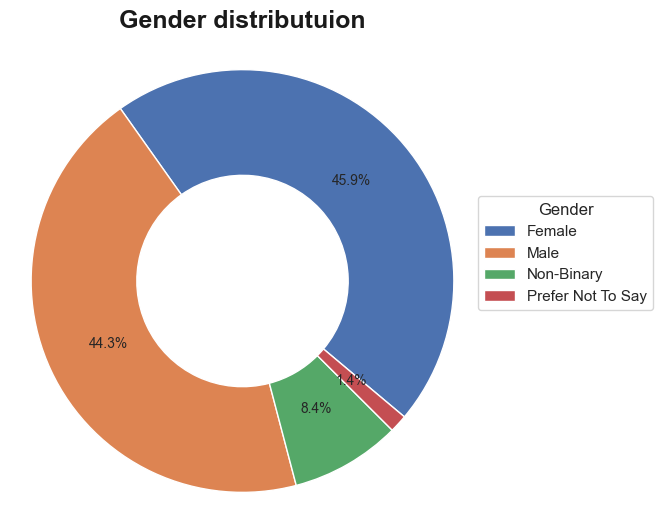

In [31]:
# Dùng a figure with subplots
fig, axs = plt.subplots(figsize=(6, 6))

# Dùng function to create pie plots
create_pie_plot_from_column(axs, df_employee, 'Gender', title='Gender distribution',title_color="darkblue",
                            show_labels=False, show_legend=True,x_leg=1.4, y_leg=0.7, with_leader_lines=False)
plt.title('Gender distributuion', y= 1.03,ha='center', fontsize=18, fontweight='bold',color="k")
plt.show()


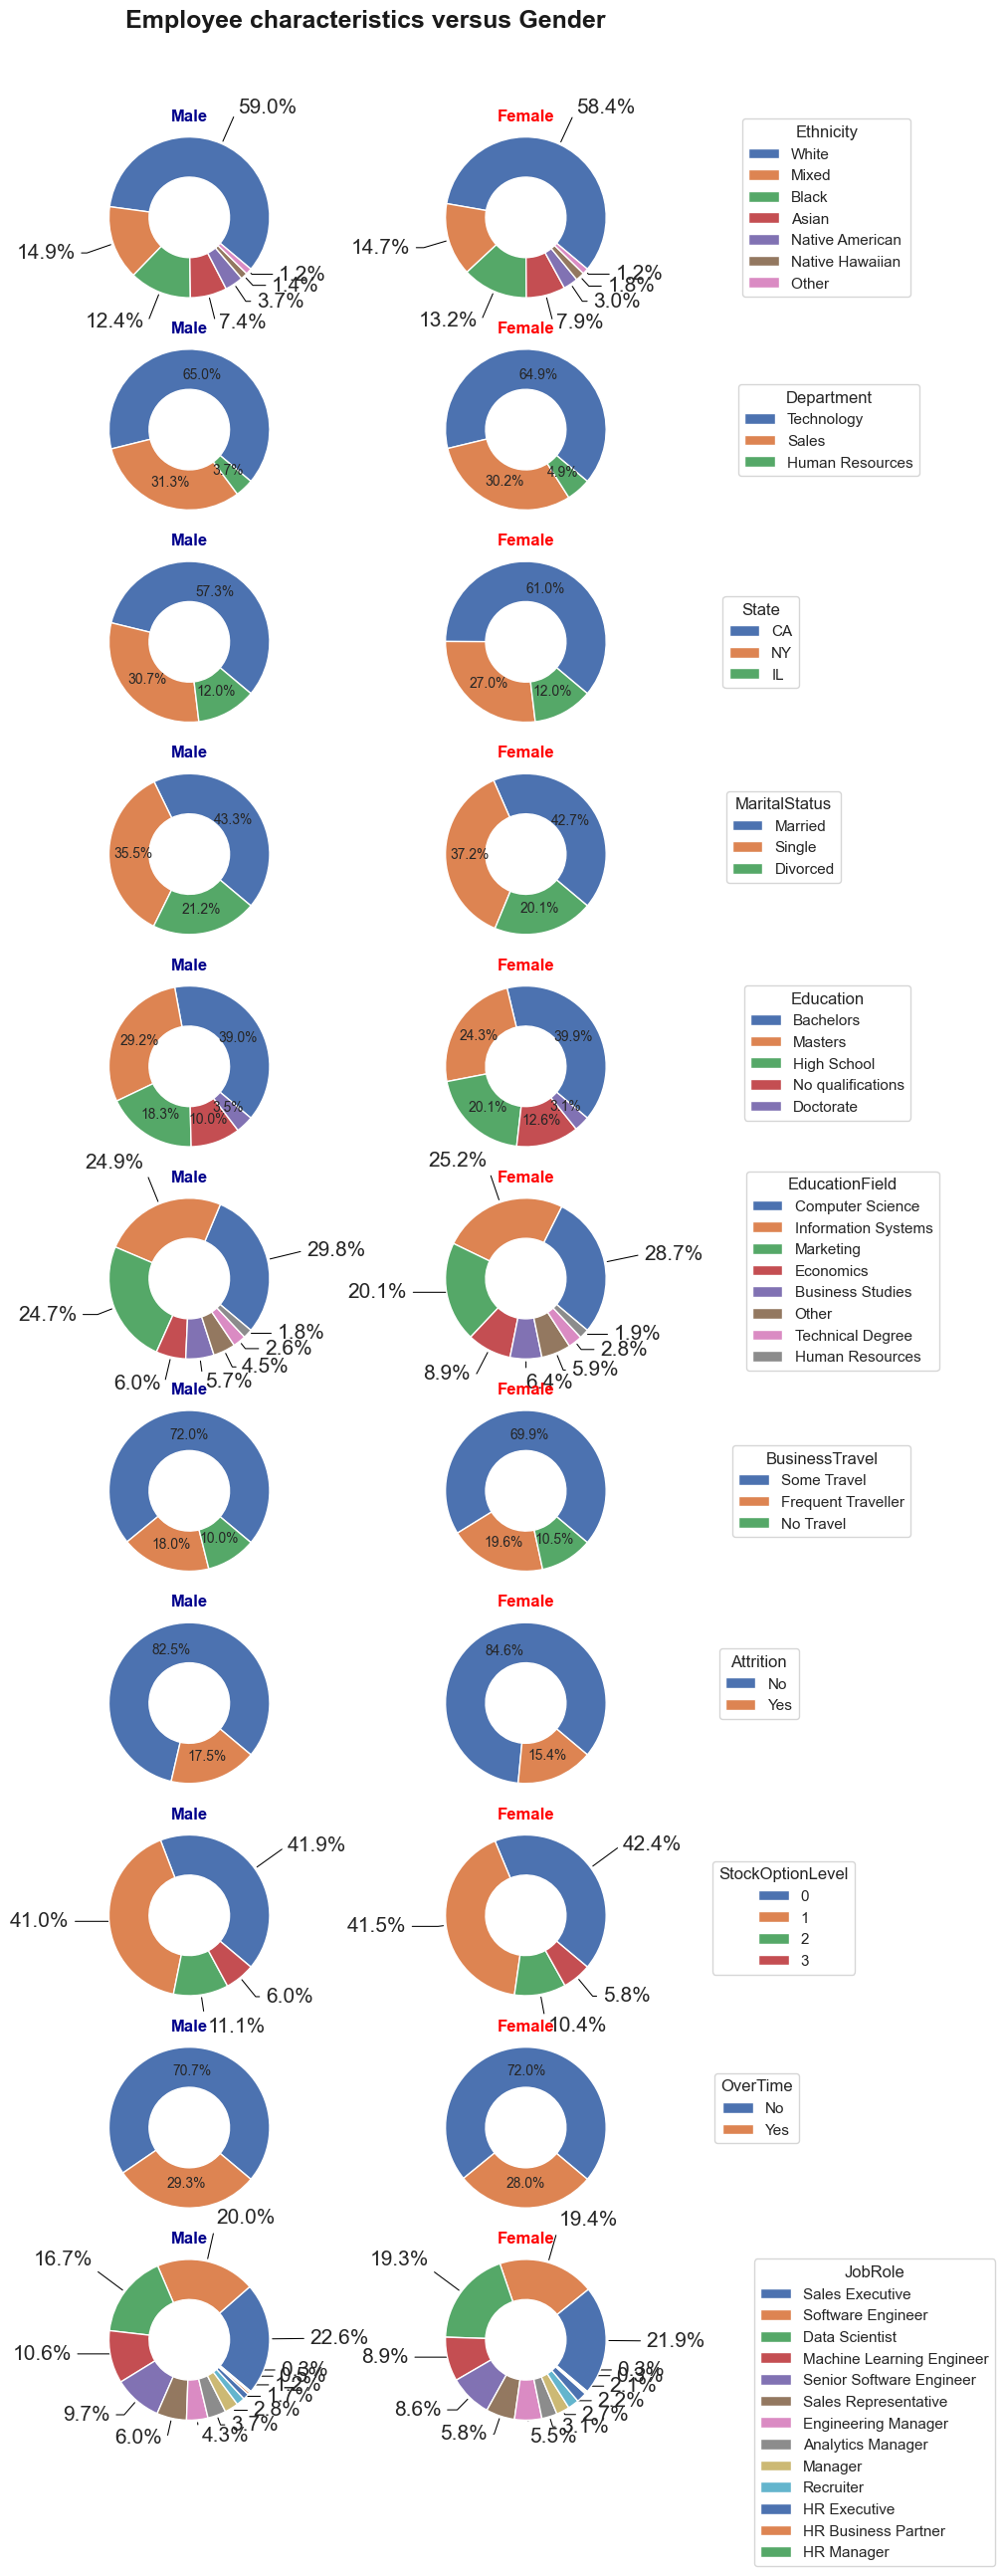

In [32]:
fig, axs = plt.subplots(11,2, figsize=(8,30))
plt.suptitle('     Employee characteristics versus Gender', ha='center', fontsize=18, fontweight='bold',color="k",y=0.92)
create_pie_plot_from_column(axs[0,0], df_male, 'Ethnicity', title='Male',title_color="darkblue", show_labels=False, show_legend=False, with_leader_lines=True)
create_pie_plot_from_column(axs[0,1], df_female, 'Ethnicity', title='Female',title_color="red", show_labels=False,show_legend=True,x_leg=1.9, y_leg=1.1, with_leader_lines=True)
create_pie_plot_from_column(axs[1,0], df_male, 'Department', title='Male',title_color="darkblue", show_labels=False, show_legend=False, with_leader_lines=False)
create_pie_plot_from_column(axs[1,1], df_female, 'Department', title='Female',title_color="red", show_labels=False, show_legend=True,x_leg=1.93, y_leg=0.8, with_leader_lines=False)
create_pie_plot_from_column(axs[2,0], df_male, 'State', title='Male',title_color="darkblue", show_labels=False, show_legend=False, with_leader_lines=False)
create_pie_plot_from_column(axs[2,1], df_female, 'State', title='Female',title_color="red", show_labels=False, show_legend=True,x_leg=1.5, y_leg=0.8, with_leader_lines=False)
create_pie_plot_from_column(axs[3,0], df_male, 'MaritalStatus', title='Male',title_color="darkblue", show_labels=False, show_legend=False, with_leader_lines=False)
create_pie_plot_from_column(axs[3,1], df_female, 'MaritalStatus', title='Female',title_color="red", show_labels=False, show_legend=True,x_leg=1.65, y_leg=0.9, with_leader_lines=False)
create_pie_plot_from_column(axs[4,0], df_male, 'Education', title='Male',title_color="darkblue", show_labels=False, show_legend=False, with_leader_lines=False)
create_pie_plot_from_column(axs[4,1], df_female, 'Education', title='Female',title_color="red", show_labels=False, show_legend=True,x_leg=1.9, y_leg=1, with_leader_lines=False)
create_pie_plot_from_column(axs[5,0], df_male, 'EducationField', title='Male',title_color="darkblue", show_labels=False, show_legend=False, with_leader_lines=True)
create_pie_plot_from_column(axs[5,1], df_female, 'EducationField', title='Female',title_color="red", show_labels=False, show_legend=True,x_leg=2.0, y_leg=1.15, with_leader_lines=True)
create_pie_plot_from_column(axs[6,0], df_male, 'BusinessTravel', title='Male',title_color="darkblue", show_labels=False, show_legend=False, with_leader_lines=False)
create_pie_plot_from_column(axs[6,1], df_female, 'BusinessTravel', title='Female',title_color="red", show_labels=False, show_legend=True,x_leg=1.9, y_leg=0.8, with_leader_lines=False)
create_pie_plot_from_column(axs[7,0], df_male, 'Attrition', title='Male',title_color="darkblue", show_labels=False, show_legend=False,with_leader_lines=False)
create_pie_plot_from_column(axs[7,1], df_female, 'Attrition', title='Female',title_color="red", show_labels=False, show_legend=True,x_leg=1.5, y_leg=0.85,with_leader_lines=False)
create_pie_plot_from_column(axs[8,0], df_male, 'StockOptionLevel', title='Male',title_color="darkblue", show_labels=False, show_legend=False,with_leader_lines=True)
create_pie_plot_from_column(axs[8,1], df_female, 'StockOptionLevel', title='Female',title_color="red", show_labels=False, show_legend=True,x_leg=1.7, y_leg=0.85,with_leader_lines=True)
create_pie_plot_from_column(axs[9,0], df_male, 'OverTime', title='Male',title_color="darkblue", show_labels=False, show_legend=False,with_leader_lines=False)
create_pie_plot_from_column(axs[9,1], df_female, 'OverTime', title='Female',title_color="red", show_labels=False, show_legend=True,x_leg=1.5, y_leg=0.85,with_leader_lines=False)
create_pie_plot_from_column(axs[10,0], df_male, 'JobRole', title='Male',title_color="darkblue", show_labels=False, show_legend=False,with_leader_lines=True)
create_pie_plot_from_column(axs[10,1], df_female, 'JobRole', title='Female',title_color="red", show_labels=False, show_legend=True,x_leg=2.2, y_leg=1,with_leader_lines=True)

plt.show()

Trong tổng thể, tỷ lệ phần trăm nam và nữ trong công ty là như nhau. Nam và nữ có các đặc điểm tương tự (nguồn gốc, trình độ học vấn và công việc giống nhau).

Chúng ta có thể nói rằng một nửa công ty bao gồm các nam giới và nữ giới da trắng làm việc tại California.​⬤

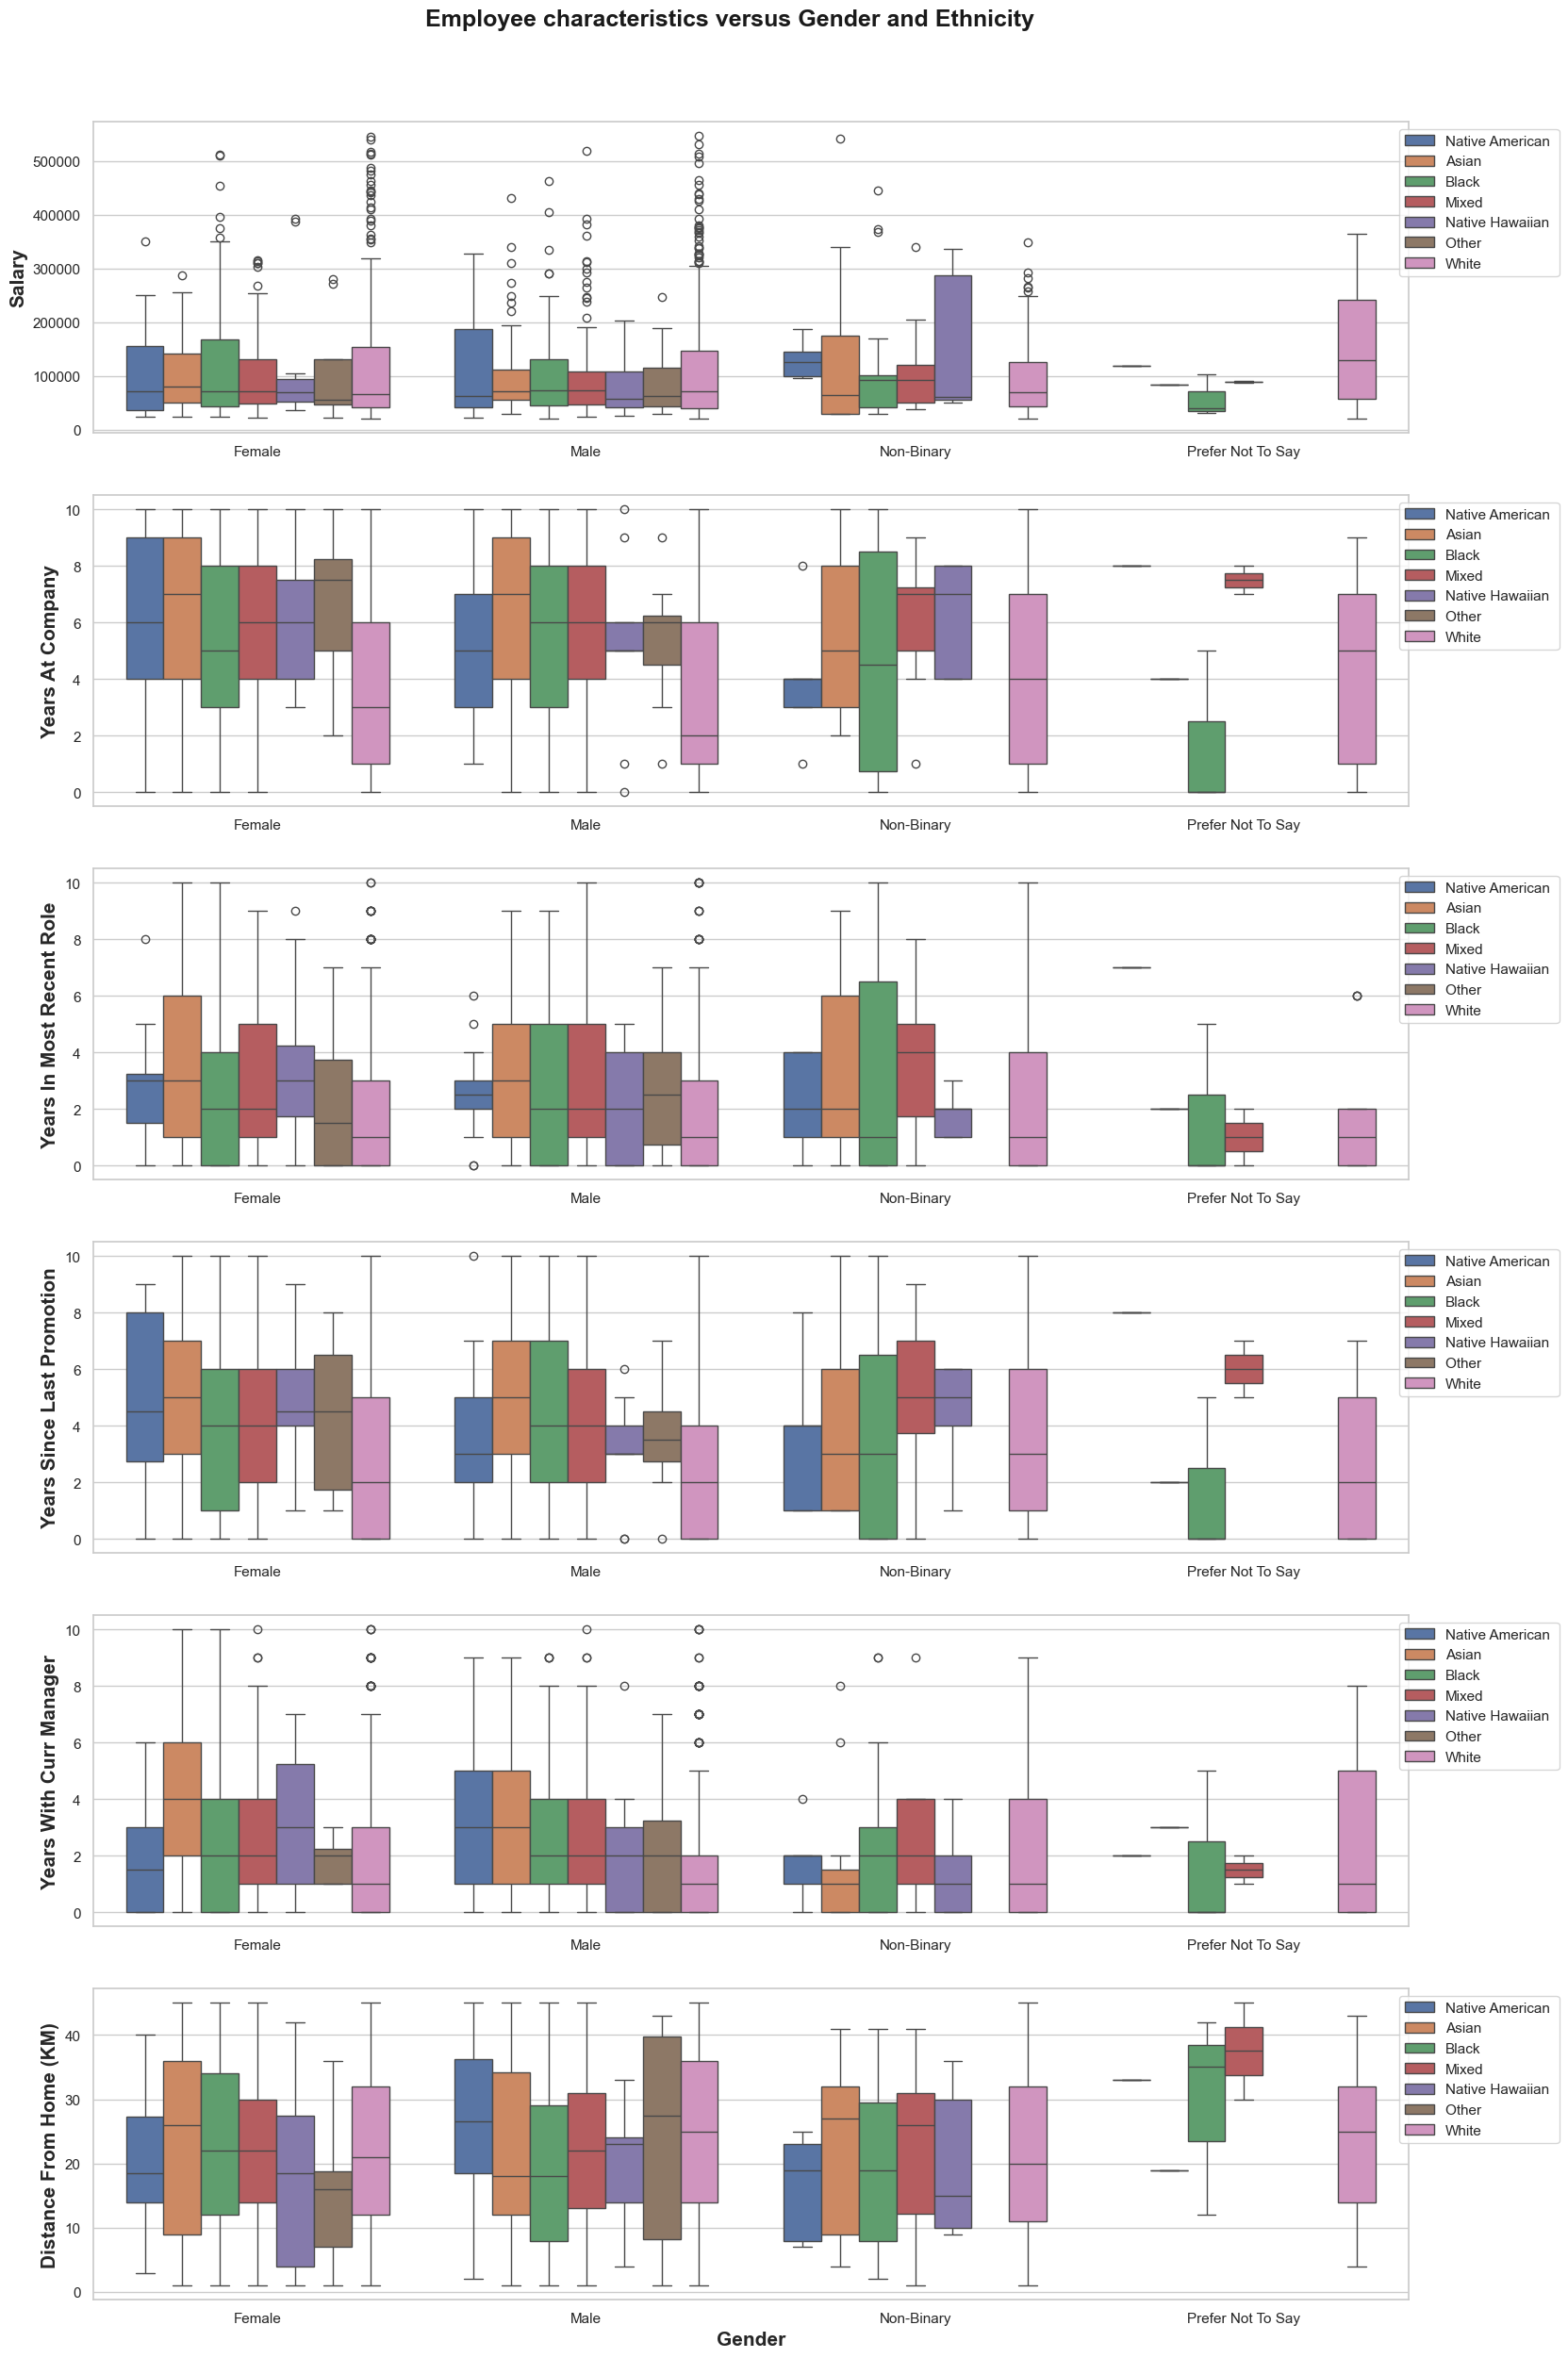

In [33]:
fig, axs = plt.subplots(6,1, figsize=(18,30)) # Creat boxplot. chart hiển thị các đặc điểm của nhân viên theo giới tính và sắc tộc
plt.suptitle('Employee characteristics versus Gender and Ethnicity', ha='center', fontsize=18, fontweight='bold',color="k",y=0.92)
a = sns.boxplot(data=df_employee, x='Gender',hue='Ethnicity', y='Salary',ax=axs[0])
axs[0].legend(loc="upper right", bbox_to_anchor=(1.12,1))
axs[0].set_ylabel('Salary',fontweight='bold')
axs[0].set_xlabel('')
sns.boxplot(data=df_employee, x='Gender',hue='Ethnicity', y='YearsAtCompany',ax=axs[1])
axs[1].legend(loc="upper right", bbox_to_anchor=(1.12,1))
axs[1].set_ylabel('Years At Company',fontweight='bold')
axs[1].set_xlabel('')
sns.boxplot(data=df_employee, x='Gender',hue='Ethnicity', y='YearsInMostRecentRole',ax=axs[2])
axs[2].legend(loc="upper right", bbox_to_anchor=(1.12,1))
axs[2].set_ylabel('Years In Most Recent Role',fontweight='bold')
axs[2].set_xlabel('')
sns.boxplot(data=df_employee, x='Gender',hue='Ethnicity', y='YearsSinceLastPromotion',ax=axs[3])
axs[3].legend(loc="upper right", bbox_to_anchor=(1.12,1))
axs[3].set_ylabel('Years Since Last Promotion',fontweight='bold')
axs[3].set_xlabel('')
sns.boxplot(data=df_employee, x='Gender',hue='Ethnicity', y='YearsWithCurrManager',ax=axs[4])
axs[4].legend(loc='upper right', bbox_to_anchor=(1.12,1))
axs[4].set_ylabel('Years With Curr Manager',fontweight='bold')
axs[4].set_xlabel('')
sns.boxplot(data=df_employee, x='Gender',hue='Ethnicity', y='DistanceFromHome (KM)',ax=axs[5])
axs[5].legend(loc='upper right', bbox_to_anchor=(1.12,1))
axs[5].set_ylabel('Distance From Home (KM)',fontweight='bold')
axs[5].set_xlabel('Gender',fontweight='bold')

plt.show()

CÁCH SO SÁNH BIỂU ĐỒ BOXPLOT
1. So sánh trung vị (Median)

	•	Quan sát đường giữa hộp: Trung vị là đường nằm giữa hộp và cho thấy giá trị trung bình của dữ liệu. So sánh độ cao của trung vị giữa các nhóm (theo giới tính và sắc tộc) để xem nhóm nào có giá trị lớn hơn.
	•	Ví dụ: Trong biểu đồ về Salary (Lương), bạn có thể thấy trung vị của người da trắng (White) ở cả nam và nữ đều cao hơn so với các nhóm sắc tộc khác. Điều này cho thấy trung bình người da trắng có mức lương cao hơn so với các sắc tộc khác.

2. So sánh phạm vi phân phối (Range)

	•	Khoảng cách giữa Q1 và Q3 (độ dài của hộp) cho thấy mức độ phân tán của dữ liệu trong mỗi nhóm. Nhóm nào có hộp dài hơn thì có sự biến động lớn hơn về dữ liệu.
	•	Ví dụ: Trong biểu đồ Years At Company (Số năm làm việc tại công ty), ta có thể thấy người da trắng và người châu Á (Asian) có hộp dài hơn so với các sắc tộc khác, điều này có thể ngụ ý rằng những người trong hai nhóm này có thời gian làm việc tại công ty rất khác nhau giữa các cá nhân trong nhóm, trong khi các sắc tộc khác có sự đồng đều hơn.

3. So sánh phạm vi tổng thể (Whiskers)

	•	Râu trên và râu dưới của boxplot cho biết giới hạn của dữ liệu (ngoại trừ các ngoại lệ). Khi so sánh các râu, bạn có thể xem phạm vi tổng thể của dữ liệu cho từng nhóm.
	•	Ví dụ: Trong biểu đồ Years Since Last Promotion (Số năm kể từ lần thăng chức gần nhất), râu của người da trắng dài hơn, đặc biệt là đối với nam giới. Điều này cho thấy rằng một số người da trắng có thể không được thăng chức trong khoảng thời gian dài hơn so với các nhóm khác.

4. Xác định các ngoại lệ (Outliers)

	•	Các điểm nằm ngoài râu của boxplot là các ngoại lệ. Nếu một nhóm có nhiều ngoại lệ hơn các nhóm khác, điều đó có thể chỉ ra sự bất thường hoặc các trường hợp đặc biệt trong nhóm đó.
	•	Ví dụ: Trong biểu đồ Salary, ta có thể thấy nhiều ngoại lệ ở mức lương cao trong nhóm nam giới da trắng, cho thấy một số người trong nhóm này có mức lương vượt xa trung vị, trong khi các nhóm khác có ít ngoại lệ hơn.

5. So sánh sự chênh lệch giữa các giới tính

	•	Ngoài việc so sánh giữa các sắc tộc, bạn cũng có thể so sánh giữa các giới tính (nam, nữ, và không nhị phân) trong cùng một sắc tộc.
	•	Ví dụ: Trong biểu đồ Salary, có sự chênh lệch rõ ràng giữa lương của nam giới và nữ giới ở một số sắc tộc, đặc biệt là đối với người da trắng, nơi mà nam giới có trung vị lương cao hơn.

6. Tổng hợp nhận định

	•	Lương (Salary): Người da trắng, cả nam và nữ, có lương trung bình cao hơn các nhóm khác. Tuy nhiên, nhóm nam giới da trắng cũng có nhiều ngoại lệ với mức lương rất cao.
	•	Số năm làm việc tại công ty (Years At Company): Người da trắng và người châu Á có số năm làm việc tại công ty lâu hơn so với các nhóm khác, với sự biến động lớn giữa các cá nhân.
	•	Số năm kể từ lần thăng chức gần nhất (Years Since Last Promotion): Người da trắng, đặc biệt là nam giới, có thời gian kể từ lần thăng chức gần nhất dài hơn so với các nhóm khác, điều này có thể chỉ ra rằng họ có thể ít được thăng chức hơn sau khi đã đạt được một mức độ nhất định.
	•	Khoảng cách từ nhà đến nơi làm việc (Distance From Home): Có sự biến động khá lớn trong khoảng cách từ nhà đến nơi làm việc giữa các nhóm, nhưng không có nhóm nào thực sự nổi bật về mặt này.

Tóm lại, khi so sánh các boxplot trong biểu đồ của bạn:

	•	Người da trắng có xu hướng nhận mức lương cao hơn, làm việc lâu năm hơn và có nhiều sự khác biệt về thời gian thăng chức so với các nhóm khác.
	•	Người châu Á có xu hướng làm việc tại công ty lâu năm hơn, nhưng sự phân tán về lương không lớn như người da trắng.
	•	Cần xem xét thêm để xác định xem sự khác biệt về lương và thăng chức có liên quan đến yếu tố tuổi tác hoặc thời gian làm việc tại công ty hay không.

1. Mức lương (Salary):

	•	Nhìn chung, có sự chênh lệch khá lớn về mức lương giữa các sắc tộc và giới tính.
	•	Nam giới có mức lương trung bình cao hơn đáng kể so với nữ giới và người không xác định giới tính (Non-Binary).
	•	Sắc tộc White có xu hướng nhận lương cao hơn so với các sắc tộc khác, đặc biệt là trong nhóm nam và người không xác định giới tính.
	•	Có một số sắc tộc có mức lương rất cao vượt trội, thể hiện qua những điểm outlier (giá trị ngoại lệ) trên biểu đồ.

2. Số năm làm việc tại công ty (Years At Company):

	•	Nhìn chung, số năm làm việc không có sự chênh lệch rõ rệt giữa các nhóm giới tính và sắc tộc.
	•	Một số nhóm có xu hướng làm việc trong công ty lâu hơn, đặc biệt là ở nhóm Non-Binary và Prefer Not To Say.
	•	Đặc biệt, nhóm Native Hawaiian và White có số năm làm việc trung bình cao hơn ở một số nhóm giới tính.

3. Số năm trong vai trò gần đây nhất (Years In Most Recent Role):

	•	Các nhóm sắc tộc và giới tính đều có sự phân bố khá đều về số năm trong vai trò gần đây nhất.
	•	Không có nhóm nào có xu hướng vượt trội đáng kể về thời gian làm việc trong vai trò gần đây nhất, nhưng một số outlier thể hiện có nhân viên đã ở vai trò này rất lâu.

4. Số năm kể từ lần thăng chức gần nhất (Years Since Last Promotion):

	•	Các nhóm giới tính và sắc tộc đều có sự phân bố tương đối tương đồng.
	•	Nhóm Male và Non-Binary có nhiều outlier cho thấy có một số cá nhân đã không được thăng chức trong thời gian dài.
	•	Female và Prefer Not To Say có sự phân bố hẹp hơn, cho thấy thời gian kể từ lần thăng chức gần đây hơn.

5. Số năm làm việc với quản lý hiện tại (Years With Curr Manager):

	•	Nhìn chung, không có sự khác biệt lớn về số năm làm việc với quản lý hiện tại giữa các nhóm sắc tộc và giới tính.
	•	Một số outlier cho thấy có những người đã làm việc với quản lý hiện tại trong thời gian dài hơn mức trung bình.
	•	Các sắc tộc như White và Asian dường như có thời gian làm việc với quản lý lâu hơn so với các sắc tộc khác.

6. Khoảng cách từ nhà đến nơi làm việc (Distance From Home):

	•	Nhóm Non-Binary và Prefer Not To Say có khoảng cách từ nhà đến nơi làm việc trung bình lớn hơn so với nhóm Male và Female.
	•	Native Hawaiian trong nhóm Non-Binary có sự chênh lệch rất lớn, thể hiện qua những giá trị ngoại lệ rất cao.
	•	Nhóm Female có sự phân bố khoảng cách khá đồng đều giữa các sắc tộc.

Kết luận:

	•	Mức lương có sự phân biệt đáng kể giữa giới tính và sắc tộc, trong đó nam giới và sắc tộc White thường có mức lương cao hơn.

	•	Các đặc điểm như số năm làm việc tại công ty, số năm kể từ lần thăng chức gần nhất và số năm với quản lý hiện tại không có sự chênh lệch quá lớn giữa các nhóm giới tính và sắc tộc.
	
	•	Khoảng cách từ nhà đến nơi làm việc có sự biến đổi đáng kể, đặc biệt đối với các nhóm Non-Binary và một số sắc tộc cụ thể.


Công ty dường như được thành lập bởi người da trắng: họ có thâm niên làm việc lâu nhất trong công ty và lương cao nhất.

Có vẻ như người da trắng cũng thường xuyên được thăng chức hơn… Nhưng có lẽ điều đó là do họ là những nhân viên lâu năm nhất… cần kiểm tra thêm về điều này…

In [34]:
# Tính số năm giữa thời gian được tuyển dụng và thăng chức
df_employee['year_between_hired_a_promoted'] = df_employee['YearsAtCompany']-df_employee['YearsSinceLastPromotion']
df_employee['year_between_hired_a_promoted'].min()

np.int64(0)

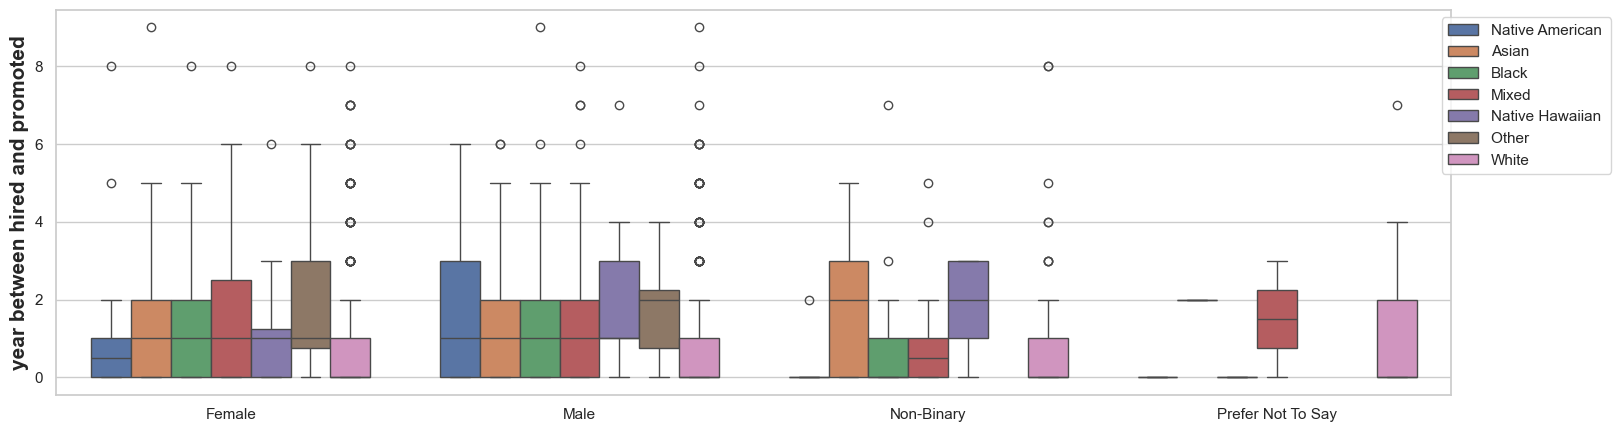

In [35]:
#Biểu thị số năm giữa việc được tuyển dụng và thăng chức
fig, axs = plt.subplots(figsize=(18,5))
a = sns.boxplot(data=df_employee, x='Gender',hue='Ethnicity', y='year_between_hired_a_promoted')
plt.legend(loc="upper right", bbox_to_anchor=(1.12,1))
plt.ylabel('year between hired and promoted',fontweight='bold')
plt.xlabel('')
plt.show()

1. So sánh Mean (đường trung vị)

    •	Nhóm Female: Trong các sắc tộc, nhóm Native America và White có trung vị thấp, nghĩa là thời gian thăng chức của họ ngắn hơn.

    •	Nhóm Male: Trong các sắc tộc, nhóm Other có trung vị cao hơn các nhóm khác, Native America và White có trung vị thấp, nghĩa là thời gian thăng chức của nhóm Other là lâu nhất và nhóm 

    •	Nhóm Non-Binary: Trung vị của nhóm Native Hawaiian, Asia là cao nhất, trong khi các nhóm khác như có trung vị thấp hơn.

	•	Nhóm Prefer Not to Say: Trung vị của nhóm Asia là cao nhất, trong khi các nhóm khác có trung vị thấp hơn.
    
   ->  Nhận định từ trung vị: Trong cả hai nhóm Female và Male, nhóm White có xu hướng có thời gian thăng chức ít nhất. Nhóm Other (Male) dường như có thời gian thăng chức lâu nhất.

2. So sánh chiều dài của hộp (boxplot):

	•	Nhóm Female: Hộp của nhóm Mixed dài nhất, điều này cho thấy sự biến động về thời gian giữa khi được tuyển dụng và thăng chức trong các nhóm này là lớn hơn. Ngược lại, nhóm Native American và Other có hộp ngắn hơn, thể hiện sự đồng đều hơn trong thời gian thăng chức.

	•	Nhóm Male: Nhóm Native American có hộp rất dài, thể hiện sự phân tán lớn về thời gian thăng chức. Nhóm White có hộp ngắn nhất.

	•	Nhóm Non-Binary: Nhóm Asia có hộp dài hơn so với các nhóm khác, cho thấy sự biến động lớn hơn trong thời gian thăng chức.
	
	•	Nhóm Prefer Not to Say: Nhóm White có hộp dài nhất, nghĩa là thời gian thăng chức giữa các cá nhân trong nhóm này có sự biến động lớn.

-> Nhận định từ chiều dài hộp: Nhóm Native American (Male) có sự phân tán lớn nhất về thời gian thăng chức, trong khi nhóm Native American (Female và Non-Binary) có sự biến động nhỏ hơn.


3. So sánh giữa Q1 và Q3:

	•	Nhóm Female: Nhóm Other và White có Q3 nằm khá xa so với Q1, nghĩa là có một số cá nhân trong nhóm có thời gian thăng chức dài hơn nhiều so với phần còn lại, còn Netive hawai thì ngược lại có ít người được tăhng chức sớm hơn các nhóm khác.

	•	Nhóm Male: Nhóm Other có Q3 thấp hơn nhiều so với Q1, cho thấy có sự phân tán mạnh ở phần trên của dữ liệu. có nhiều người thăng chức lâu hơn

	•	Nhóm Non-Binary: Nhóm Native American có sự phân tán lớn ở phần dướ (Q1) nghĩa là số người thăng chức lâu hơn nhiều hơn số người thắng chức sớm .
    
	•	Nhóm Prefer Not to Say: Nhóm Native American, Asia và Black có sự phân tán đầu đều các bạn có sự thăng chức tương đương nhau

Nhận định từ Q1 và Q3: Nhóm Other (Male và Female) có sự phân tán mạnh nhất có sự phân tán trái ngược nhau, Female tăhng chức sớm hơn male.

4. So sánh râu:
	 •	Nhóm “FeMale - White & Netive America” có râu trên ngắn hơn so với các nhóm khác: Điều này cho thấy rằng dữ liệu về thời gian từ khi được thuê đến khi thăng chức của nhóm này có ít biến động về phía các giá trị lớn hơn (thăng chức muộn hơn).

	•	Nhóm “Male - Native American, Asia, Black & Mix” có râutrên dưới dài hơn: Điều này có thể cho thấy nhiều người trong nhóm này được thăng chức muộn hơn các nhóm còn lại.

    •	Nhóm “MNon-Binary - Native Hawai ” không có râu trên: Điều này có thể cho thấy  trong nhóm ngần như không ai thăng chức muộn cả, Asia thì có râu dài nhất cho thấy  trong nhóm nhiều ngừoi tăhng chức muộn so với các nhóm khác.

    •	Nhóm Prefer Not to Say - White: có râu dài nhất cho thấy trong nhóm nhiều ngừoi tăhng chức muộn so với các nhóm khác.

Nhận định từ râu: Nhóm White (Male và Female) cho thấy rằng dữ liệu về thời gian từ khi được thuê đến khi thăng chức của nhóm này có ít biến động về phía các giá trị lớn hơn.
Nhưng về outliner thì nhóm này ngược lại vẫn có 1 số nhỏ người tăhng chứuc rất muộn



## <a id="2.2"></a>
## 2.2: Đặc điểm của nhân viên đã phát triển như thế nào kể từ năm 2012?


1.	Tính năm mà nhân viên rời công ty:

  Mục đích chính:
	  •	Theo dõi sự thay đổi về đặc điểm nhân viên qua các năm: Mỗi dataframe đại diện cho danh sách nhân viên đang làm việc trong từng năm. Bằng cách phân tích từng dataframe này, có thể so sánh các đặc điểm (như số năm làm việc, mức lương, vị trí, v.v.) của nhân viên qua các năm để xem sự phát triển hoặc thay đổi theo thời gian.


#	1.	Tính năm mà nhân viên rời công ty: VD
	•	Nhân viên 1:
	•	HireDate: 01/01/2010
	•	YearsAtCompany: 5
	•	Năm rời công ty = 01/01/2010 + 5 năm = 01/01/2015
=> year_left: 2015

In [36]:
#Tao cột year_left năm mà nhân viên rời công ty
df_employee['year_left'] = df_employee.apply(lambda x: x['HireDate'] + pd.DateOffset(years=x['YearsAtCompany']), axis=1)

In [37]:
# 2.	Tạo dataframe chứa nhân viên làm việc trong từng năm cụ thể:
df_employee_2012 = df_employee[(df_employee['HireDate'].dt.year<=2012)&(df_employee['year_left'].dt.year>2012)] #năm thuê nhỏ hơn 2012 và năm rời > 2012
df_employee_2013 = df_employee[(df_employee['HireDate'].dt.year<=2013)&(df_employee['year_left'].dt.year>2013)]
df_employee_2014 = df_employee[(df_employee['HireDate'].dt.year<=2014)&(df_employee['year_left'].dt.year>2014)]
df_employee_2015 = df_employee[(df_employee['HireDate'].dt.year<=2015)&(df_employee['year_left'].dt.year>2015)]
df_employee_2016 = df_employee[(df_employee['HireDate'].dt.year<=2016)&(df_employee['year_left'].dt.year>2016)]
df_employee_2017 = df_employee[(df_employee['HireDate'].dt.year<=2017)&(df_employee['year_left'].dt.year>2017)]
df_employee_2018 = df_employee[(df_employee['HireDate'].dt.year<=2018)&(df_employee['year_left'].dt.year>2018)]
df_employee_2019 = df_employee[(df_employee['HireDate'].dt.year<=2019)&(df_employee['year_left'].dt.year>2019)]
df_employee_2020 = df_employee[(df_employee['HireDate'].dt.year<=2020)&(df_employee['year_left'].dt.year>2020)]
df_employee_2021 = df_employee[(df_employee['HireDate'].dt.year<=2021)&(df_employee['year_left'].dt.year>2021)]
df_employee_2022 = df_employee[(df_employee['HireDate'].dt.year<=2022)]
list_df_employee = [df_employee_2012,df_employee_2013,df_employee_2014,df_employee_2015,df_employee_2016,df_employee_2017,
                   df_employee_2018,df_employee_2019,df_employee_2020,df_employee_2021,df_employee_2022]


In [38]:
# Mục đính đếm số lần để hiểu được tần suất phân bố data
def extract_yearly_information(df):
    nb_employee = df.shape[0]
    # Đếm số lần xuất hiện của mỗi danh mục trong cột ‘Gender’.
    gender_counts = df['Gender'].value_counts()
    gender_counts_list = list(gender_counts.items())
    # Đếm số lần xuất hiện của mỗi danh mục trong cột ‘Education’.
    Education_counts = df['Education'].value_counts()
    Education_counts_list = list(Education_counts.items())
    # Đếm số lần xuất hiện của mỗi danh mục trong cột ‘Ethnicity’.
    Ethnicity_counts = df['Ethnicity'].value_counts()
    Ethnicity_counts_list = list(Ethnicity_counts.items())
    # Đếm số lần xuất hiện của mỗi danh mục trong cột ‘Attrition’.
    Attrition_counts = df['Attrition'].value_counts()
    Attrition_counts_list = list(Attrition_counts.items())
    return nb_employee,gender_counts_list,Education_counts_list,Ethnicity_counts_list,Attrition_counts_list
    

nb_employee_2012,list_gender_2012,list_education_2012,list_ethnicity_2012,list_attrition_2012 = extract_yearly_information(df_employee_2012)
nb_employee_2013,list_gender_2013,list_education_2013,list_ethnicity_2013,list_attrition_2013 = extract_yearly_information(df_employee_2013)
nb_employee_2014,list_gender_2014,list_education_2014,list_ethnicity_2014,list_attrition_2014 = extract_yearly_information(df_employee_2014)
nb_employee_2015,list_gender_2015,list_education_2015,list_ethnicity_2015,list_attrition_2015 = extract_yearly_information(df_employee_2015)
nb_employee_2016,list_gender_2016,list_education_2016,list_ethnicity_2016,list_attrition_2016 = extract_yearly_information(df_employee_2016)
nb_employee_2017,list_gender_2017,list_education_2017,list_ethnicity_2017,list_attrition_2017 = extract_yearly_information(df_employee_2017)
nb_employee_2018,list_gender_2018,list_education_2018,list_ethnicity_2018,list_attrition_2018 = extract_yearly_information(df_employee_2018)
nb_employee_2019,list_gender_2019,list_education_2019,list_ethnicity_2019,list_attrition_2019 = extract_yearly_information(df_employee_2019)
nb_employee_2020,list_gender_2020,list_education_2020,list_ethnicity_2020,list_attrition_2020 = extract_yearly_information(df_employee_2020)
nb_employee_2021,list_gender_2021,list_education_2021,list_ethnicity_2021,list_attrition_2021 = extract_yearly_information(df_employee_2021)
nb_employee_2022,list_gender_2022,list_education_2022,list_ethnicity_2022,list_attrition_2022 = extract_yearly_information(df_employee_2022)

In [39]:
#dùng hàm prepare_df() tổng hợp thông tin về sự phân bố của một biến danh mục (ví dụ: giới tính, học vấn, dân tộc) 
# qua các năm và trả về một DataFrame thể hiện sự thay đổi của biến đó theo thời gian
  
def prepare_df(column,list_var_2012, list_var_2013,list_var_2014,list_var_2015,list_var_2016,
               list_var_2017, list_var_2018, list_var_2019,list_var_2020, list_var_2021, list_var_2022):
    
    list_year = [year for year in range(2012, 2023)] #tạo list_year qua vòng lập for từ 2012 - 2023
    #Tạo DataFrames cho từng năm:
    df_variable_2012= pd.DataFrame(list_var_2012,columns=[column, 'count']) 
    df_variable_2013= pd.DataFrame(list_var_2013,columns=[column, 'count'])
    df_variable_2014= pd.DataFrame(list_var_2014,columns=[column, 'count'])
    df_variable_2015= pd.DataFrame(list_var_2015,columns=[column, 'count'])
    df_variable_2016= pd.DataFrame(list_var_2016,columns=[column, 'count'])
    df_variable_2017= pd.DataFrame(list_var_2017,columns=[column, 'count'])
    df_variable_2018= pd.DataFrame(list_var_2018,columns=[column, 'count'])
    df_variable_2019= pd.DataFrame(list_var_2019,columns=[column, 'count'])
    df_variable_2020= pd.DataFrame(list_var_2020,columns=[column, 'count'])
    df_variable_2021= pd.DataFrame(list_var_2021,columns=[column, 'count'])
    df_variable_2022= pd.DataFrame(list_var_2022,columns=[column, 'count'])
    #thiết lập chỉ mục để dễ concat
    df_variable_2012 = df_variable_2012.set_index(column)
    df_variable_2013 = df_variable_2013.set_index(column)
    df_variable_2014 = df_variable_2014.set_index(column)
    df_variable_2015 = df_variable_2015.set_index(column)
    df_variable_2016 = df_variable_2016.set_index(column)
    df_variable_2017 = df_variable_2017.set_index(column)
    df_variable_2018 = df_variable_2018.set_index(column)
    df_variable_2019 = df_variable_2019.set_index(column)
    df_variable_2020 = df_variable_2020.set_index(column)
    df_variable_2021 = df_variable_2021.set_index(column)
    df_variable_2022 = df_variable_2022.set_index(column)
# Ghép các data frame lại 
    df_variable_evolution = pd.concat([df_variable_2012,df_variable_2013,df_variable_2014,df_variable_2015,df_variable_2016,
                       df_variable_2017,df_variable_2018,df_variable_2019,df_variable_2020,df_variable_2021,df_variable_2022], axis=1)

    df_variable_evolution.columns = list_year #đặt tên cho bảng 
    df_variable_evolution=df_variable_evolution.T
    return  df_variable_evolution

Tạo DataFrames cho từng năm:
	•	Mỗi danh sách dữ liệu của từng năm (list_var_2012, list_var_2013,…) được chuyển thành một DataFrame với hai cột: một là tên của biến danh mục (được truyền vào thông qua tham số column), và một là số lần xuất hiện (count).

In [40]:
#tạo dataframe mới để theo dõi các chỉ mục như gender education,...
df_gender_evolution = prepare_df('Gender', list_gender_2012,list_gender_2013,list_gender_2014,list_gender_2015,list_gender_2016,
               list_gender_2017,list_gender_2018,list_gender_2019,list_gender_2020,list_gender_2021,list_gender_2022 )
df_attrition_evolution = prepare_df('Attrition', list_gender_2012,list_gender_2013,list_gender_2014,list_gender_2015,list_gender_2016,
               list_gender_2017,list_gender_2018,list_gender_2019,list_gender_2020,list_gender_2021,list_gender_2022 )
df_ethnicity_evolution = prepare_df('Ethnicity', list_gender_2012,list_gender_2013,list_gender_2014,list_gender_2015,list_gender_2016,
               list_gender_2017,list_gender_2018,list_gender_2019,list_gender_2020,list_gender_2021,list_gender_2022 )
df_education_evolution = prepare_df('Education', list_gender_2012,list_gender_2013,list_gender_2014,list_gender_2015,list_gender_2016,
               list_gender_2017,list_gender_2018,list_gender_2019,list_gender_2020,list_gender_2021,list_gender_2022 )

In [41]:
#Tính số lượng nhân viên qua từng năm
list_year = [year for year in range(2012, 2023)]
list_nb_employee = [nb_employee_2012,nb_employee_2013,nb_employee_2014,nb_employee_2015,nb_employee_2016,nb_employee_2017,
nb_employee_2018,nb_employee_2019,nb_employee_2020,nb_employee_2021,nb_employee_2022] #danh sách nhân viên qua từng năm

df_nb_employee = pd.DataFrame(list(zip(list_year, list_nb_employee)), columns=['year', 'nb_employee'])
df_nb_employee = df_nb_employee.set_index("year")


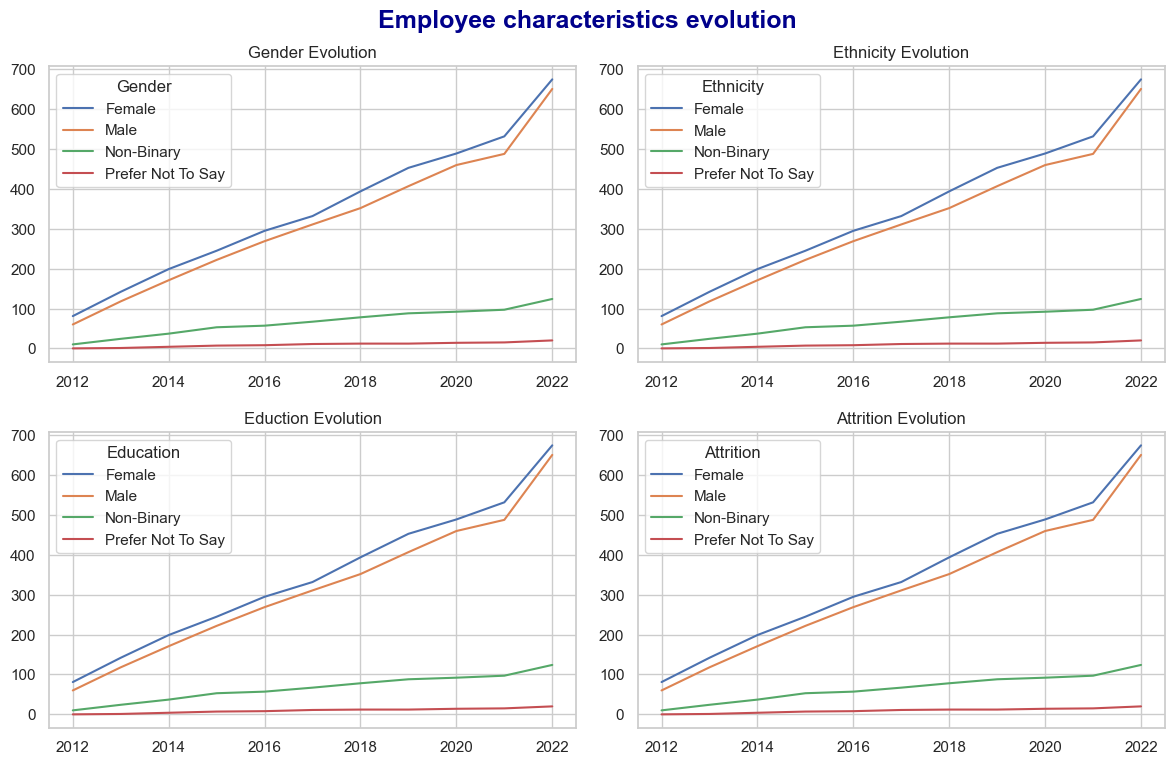

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot data on each subplot
plt.suptitle('Employee characteristics evolution', ha='center', fontsize=18, fontweight='bold',color='darkblue',y=0.96)
df_gender_evolution.plot(ax=axs[0, 0], title='Gender Evolution')
df_ethnicity_evolution.plot(ax=axs[0, 1], title='Ethnicity Evolution')
df_education_evolution.plot(ax=axs[1, 0], title='Eduction Evolution')
df_attrition_evolution.plot(ax=axs[1, 1], title='Attrition Evolution')


plt.tight_layout()
plt.show()

KẾT LUẬN

	•	Không quan sát thấy sự bất bình đẳng giữa nam và nữ về vai trò, mức lương hay nền tảng.
	•	Số lượng người da trắng trong công ty cao (gần một nửa), nhưng vẫn thấp hơn so với tỷ lệ người da trắng sống ở Mỹ (61,6%).
	•	Người da trắng cũng có mức lương cao nhất, nhưng có vẻ như công ty được thành lập bởi họ.
	•	Phần lớn nhân viên sống ở California, nơi mà 40% dân số là người Latinos. Nhóm dân tộc này không được đại diện trong công ty; ở California, người Latinos chủ yếu làm việc như là làm vườn, công nhân nông trại hoặc công nhân xây dựng.​

## <a id="2.2"></a>
## 2.2: Khi nào đánh giá hiệu suất được thực hiện
?

In [43]:
df_employee.columns

Index(['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'State',
       'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus',
       'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'year_between_hired_a_promoted', 'year_left'],
      dtype='object')

In [44]:
### Tính số lượng nhận viên mỗi tháng
# Chuyển định dạng HireDate thành định dạng period 
df_employee['HireDate'] = df_employee['HireDate'].dt.to_period('M')
# Đếm số lượng nhân viên được tuyển dụng trong mỗi tháng.
nb_employee_per_month = df_employee.groupby('HireDate').size()

### Tính số lượng đánh giá mỗi tháng
# Giống trên
df_performance['review_Y_M'] = df_performance['ReviewDate'].dt.to_period('M')
# Đếm
nb_review_per_month = df_performance.groupby('review_Y_M').size()

##  Tạo DataFrame df_count_employee và tính số lượng nhân viên tích lũy:
df_count_review   = pd.DataFrame({'Month':nb_review_per_month.index, 'count_review':nb_review_per_month.values}) 
df_count_employee = pd.DataFrame({'Month':nb_employee_per_month.index, 'count_employee':nb_employee_per_month.values})
df_count_review   = df_count_review.set_index('Month')
df_count_employee = df_count_employee.set_index('Month')
df_count_employee['cum_nb_employee'] = df_count_employee['count_employee'].cumsum()
df_count_employee.head(2)

,count_employee,cum_nb_employee
Month,,
2012-01,33,33
2012-02,29,62


	•	Mục tiêu chính là theo dõi số lượng nhân viên được tuyển dụng trong từng tháng và tính tổng số nhân viên tích lũy qua thời gian.
    
	•	Mục đích của cột tích lũy: Cột cum_nb_employee rất hữu ích để nắm bắt sự tăng trưởng tổng thể của công ty theo thời gian (dựa trên số lượng nhân viên được tuyển dụng), giúp phân tích xu hướng tuyển dụng và đánh giá sự mở rộng của công ty.

In [45]:
# Step 1: Combine 2 tập dataf
all_dates = df_count_employee.index.union(df_count_review.index)

# Step 2: Đặt chỉ số cho 2 datà để có cấu trúc tháng giống nhau
df_count_review = df_count_review.reindex(all_dates)
df_count_employee = df_count_employee.reindex(all_dates)

# Step 3: Gộp 2 dataf lại
df_count = pd.concat([df_count_review, df_count_employee], axis=1).fillna(0)

# Đảm bảo cột Month là chuỗi (string) để sử dụng làm trục x cho việc hiển thị:
df_count = df_count.reset_index()
df_count['Month'] = df_count['Month'].dt.strftime('%Y-%m')

df_count.head(2)

,Month,count_review,count_employee,cum_nb_employee
0,2012-01,0.0,33,33
1,2012-02,0.0,29,62


In [46]:
df_count['Month'].idxmax()  # 124 là hàng có giá trị maxium

124

In [47]:
df_count.loc[124] #truy suất hàng 124 xem giá trị lớn nhất

Month              2022-12
count_review          85.0
count_employee          13
cum_nb_employee       1470
Name: 124, dtype: object

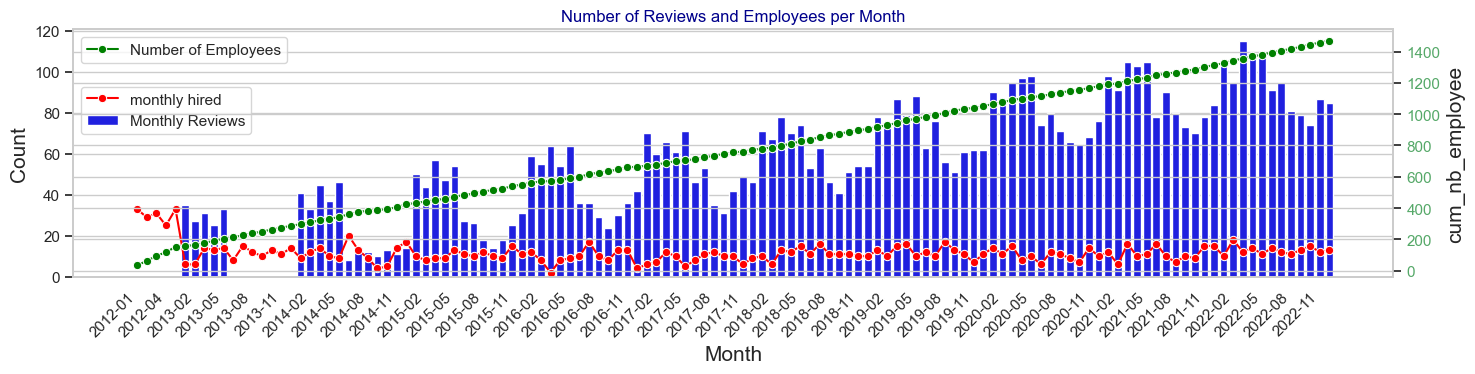

In [48]:
fig, ax = plt.subplots(figsize=(15, 4))

# Plot bar plot with Seaborn
sns.barplot(x=df_count.index, y='count_review', data=df_count, color='blue', ax=ax, label='Monthly Reviews')

# Plot line plot with Seaborn
sns.lineplot(x=df_count.index, y='count_employee', data=df_count, marker='o', color='red', ax=ax, label='monthly hired')
ax2 = ax.twinx()
sns.lineplot(x=df_count.index, y='cum_nb_employee', data=df_count, marker='o', color='green', ax=ax2, label='Number of Employees')


# Title and labels
ax.set_title('Number of Reviews and Employees per Month',color='darkblue')
ax.set_xlabel('Month')
ax.set_ylabel('Count')

# Tùy chỉnh trục x để hiển thị chỉ mỗi 3 tháng một lần
xticks_labels = df_count['Month'].unique()
every_n_months = 3
ax.set_xticks(range(0, len(xticks_labels), every_n_months))
ax.set_xticklabels(xticks_labels[::every_n_months], rotation=45, ha='right')

# Thêm legends
ax.legend(loc='upper left', bbox_to_anchor=(0, 0.8))
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.8))

# Display the plot
ax2.tick_params(axis='y', labelcolor='g')
plt.legend()
plt.tight_layout()
plt.show()


	1.	Biểu đồ cột (bar plot):
	•	Số lượng đánh giá hàng tháng (count_review) được thể hiện bằng các thanh màu xanh dương.
	2.	Biểu đồ đường (line plot):
	•	Số lượng nhân viên tuyển dụng hàng tháng (count_employee) được vẽ bằng đường màu đỏ với các dấu tròn.
	•	Số lượng nhân viên tích lũy (cum_nb_employee) được vẽ bằng đường màu xanh lá cây trên trục y thứ hai.

In [49]:
df_rating = df_performance[['EnvironmentSatisfaction','JobSatisfaction', 'RelationshipSatisfaction',
       'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken','WorkLifeBalance', 'SelfRating', 'ManagerRating']]

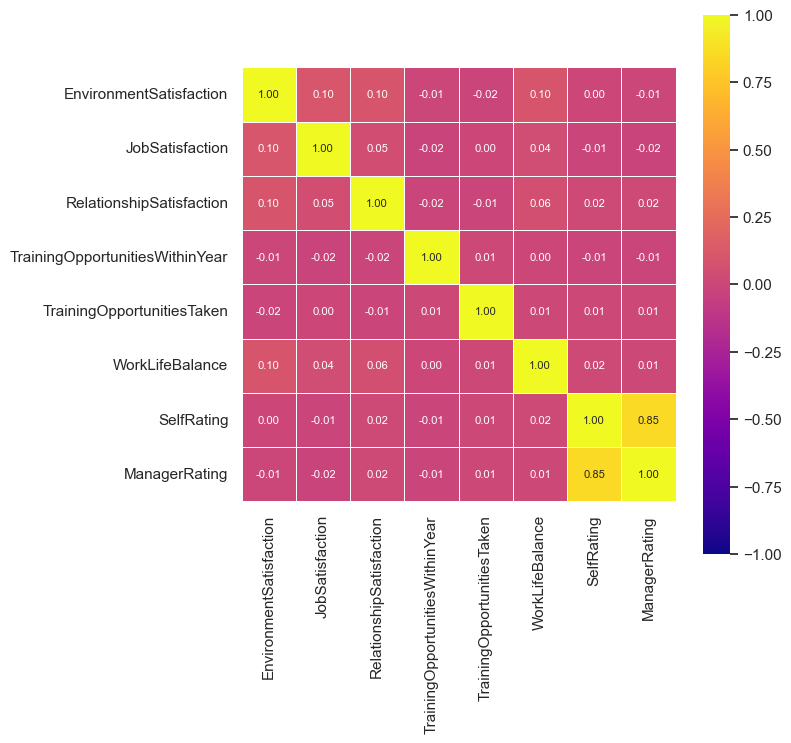

In [50]:
corr_matrix  = df_rating.corr(method='pearson')  

plt.figure(figsize=(7, 7))
annot_kws={"size": 8}
sns.heatmap(corr_matrix, annot=True, fmt=".2f",linewidths=.5,annot_kws=annot_kws,square=True,cmap = 'plasma', vmin = -1, vmax = 1, center = 0)
plt.show()

**Trong suốt những năm qua, có mối tương quan tốt giữa đánh giá tự đánh giá và đánh giá của người quản lý**

**Nhưng nó phát triển như thế nào theo thời gian?**

In [51]:
# Extract Year and Month of review
df_performance['review_Y'] = df_performance['ReviewDate'].dt.to_period('Y')

# create df_performance_per_year
df_performance_2013 = df_performance[df_performance['review_Y']=='2013']
df_performance_2014 = df_performance[df_performance['review_Y']=='2014']
df_performance_2015 = df_performance[df_performance['review_Y']=='2015']
df_performance_2016 = df_performance[df_performance['review_Y']=='2016']
df_performance_2017 = df_performance[df_performance['review_Y']=='2017']
df_performance_2018 = df_performance[df_performance['review_Y']=='2018']
df_performance_2019 = df_performance[df_performance['review_Y']=='2019']
df_performance_2020 = df_performance[df_performance['review_Y']=='2020']
df_performance_2021 = df_performance[df_performance['review_Y']=='2021']
df_performance_2022 = df_performance[df_performance['review_Y']=='2022']
df_performance_2023 = df_performance[df_performance['review_Y']=='2023']
df_performance_2024 = df_performance[df_performance['review_Y']=='2024']

In [52]:
# gộp performance and employee df:
df_2013 = pd.merge(df_performance_2013,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])
df_2014 = pd.merge(df_performance_2014,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])
df_2015 = pd.merge(df_performance_2015,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])
df_2016 = pd.merge(df_performance_2016,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])
df_2017 = pd.merge(df_performance_2017,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])
df_2018 = pd.merge(df_performance_2018,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])
df_2019 = pd.merge(df_performance_2019,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])
df_2020 = pd.merge(df_performance_2020,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])
df_2021 = pd.merge(df_performance_2021,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])
df_2022 = pd.merge(df_performance_2022,df_employee, how="inner", on=["EmployeeID", "EmployeeID"])

In [53]:
# select man and female THEO TỪNG NĂM
df_2013_m = df_2013[df_2013['Gender']=='Male']
df_2014_m = df_2014[df_2014['Gender']=='Male']
df_2015_m = df_2015[df_2015['Gender']=='Male']
df_2016_m = df_2016[df_2016['Gender']=='Male']
df_2017_m = df_2017[df_2017['Gender']=='Male']
df_2018_m = df_2018[df_2018['Gender']=='Male']
df_2019_m = df_2019[df_2019['Gender']=='Male']
df_2020_m = df_2020[df_2020['Gender']=='Male']
df_2021_m = df_2021[df_2021['Gender']=='Male']
df_2022_m = df_2022[df_2022['Gender']=='Male']

df_2013_f = df_2013[df_2013['Gender']=='Female']
df_2014_f = df_2014[df_2014['Gender']=='Female']
df_2015_f = df_2015[df_2015['Gender']=='Female']
df_2016_f = df_2016[df_2016['Gender']=='Female']
df_2017_f = df_2017[df_2017['Gender']=='Female']
df_2018_f = df_2018[df_2018['Gender']=='Female']
df_2019_f = df_2019[df_2019['Gender']=='Female']
df_2020_f = df_2020[df_2020['Gender']=='Female']
df_2021_f = df_2021[df_2021['Gender']=='Female']
df_2022_f = df_2022[df_2022['Gender']=='Female']

In [54]:
# list df:
list_df=[df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021,df_2022]#danh sách chứa các data frame
list_df_m = [df_2013_m,df_2014_m,df_2015_m,df_2016_m,df_2017_m,df_2018_m,df_2019_m,df_2020_m,df_2021_m,df_2022_m]#danh sách chứa các data frame nam
list_df_f = [df_2013_f,df_2014_f,df_2015_f,df_2016_f,df_2017_f,df_2018_f,df_2019_f,df_2020_f,df_2021_f,df_2022_f]#danh sách chứa các data frame nữ

# create list with year
list_year = [year for year in range(2013, 2023)]
list_corr =[]
list_corr_male =[]
list_corr_female =[] #Các danh sách để lưu trữ kết quả tương quan giữa đánh giá của quản lý (ManagerRating) và đánh giá tự đánh giá (SelfRating), cho tất cả các dữ liệu, dữ liệu nam, và dữ liệu nữ tương ứng.

# Tính toán sự tương quan giữa manager rating và self rating
def calcul_corr(df,list_corr):
    correlation = df['ManagerRating'].corr(df['SelfRating'])
    list_corr.append(correlation)
    
for df in list_df:
    calcul_corr(df,list_corr)

for df in list_df_m:
    calcul_corr(df,list_corr_male)

for df in list_df_f:
    calcul_corr(df,list_corr_female)
       
# Tính tỷ lêj between Manager and self Rating
def calcul_ratio(df):
    df['ratio'] = df['ManagerRating']/df['SelfRating']

for df in list_df:
    calcul_ratio(df)
    
# merge and plot result
dict = {'Year': list_year, 'corr M+F': list_corr, 'corr M': list_corr_male,'corr F': list_corr_female} 
df_corr = pd.DataFrame(dict)

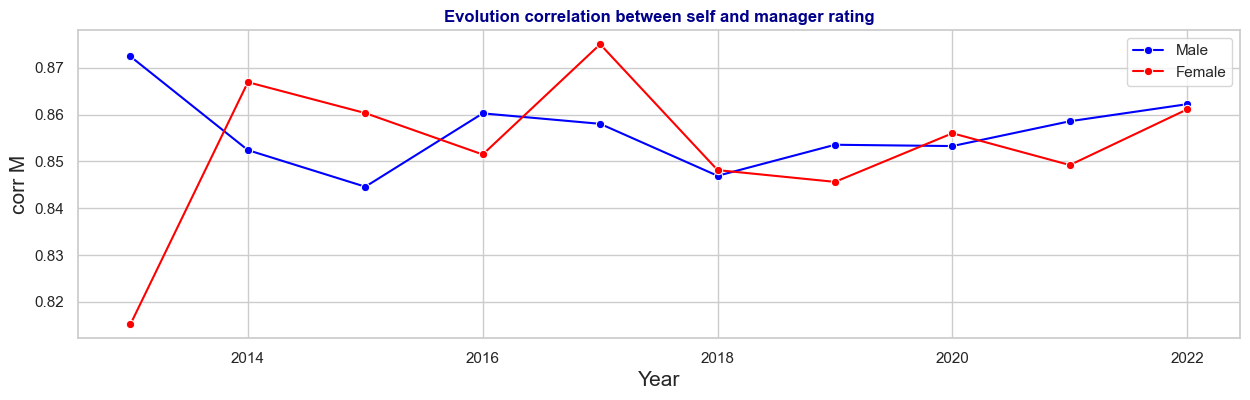

In [55]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.lineplot(x='Year', y='corr M', data=df_corr, color='blue', ax=ax, label='Male',marker='o',)
sns.lineplot(x='Year', y='corr F', data=df_corr, color='red', ax=ax, label='Female',marker='o',)
ax.set_title('Evolution correlation between self and manager rating',fontweight='bold',color='darkblue')
# ax.set_xlabel('Month')
# ax.set_ylabel('Count')
plt.show()

“Trong suốt năm qua, sự khác biệt giữa nam và nữ đã giảm. Kể từ năm 2018, các hệ số tương quan rất gần gũi và tiếp tục tăng. Nhưng liệu chúng có thực sự đồng thuận tốt không?”

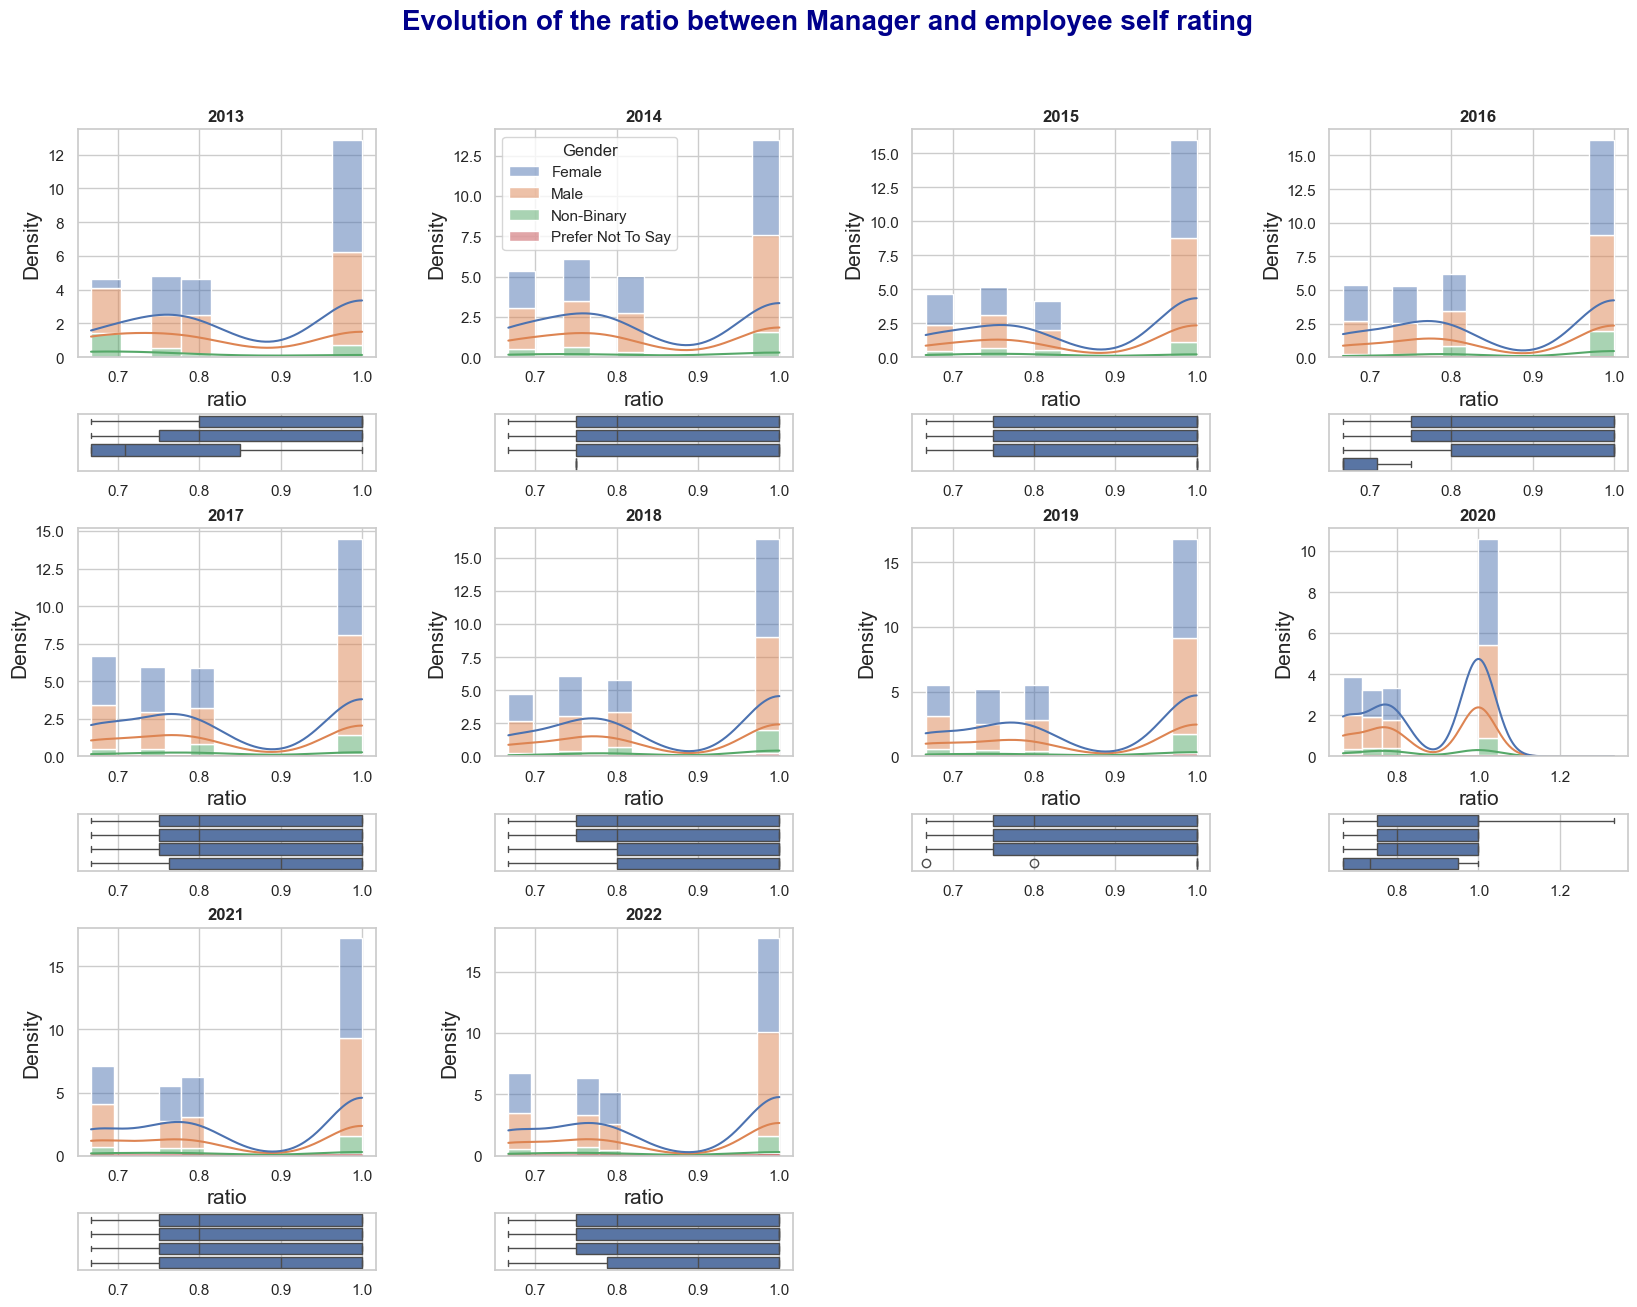

In [56]:
#đánh giá biểu diễn qua biến ratio để so sánh tỉ lệ giữa đánh giá của người quản lý và nhân viên tự đánh giá 
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Create a figure
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

# Xác định cấu hình lưới: 8 hàng (4 hàng cho biểu đồ mật độ, 4 hàng cho biểu đồ hộp
gs = GridSpec(8, 4, figure=fig, height_ratios=[4, 1] * 4)

# Density plot (Histogram with KDE)
plt.suptitle("Evolution of the ratio between Manager and employee self rating"
             , ha='center', fontsize=20, fontweight='bold',color='darkblue',y=0.94)
ax_density = fig.add_subplot(gs[0, 0])
sns.histplot(data=df_2013, x='ratio', hue='Gender', kde=True, stat="density", multiple="stack", linewidth=1.0, ax=ax_density)
ax_density.set_ylabel('Density'); ax_density.get_legend().remove()
ax_density.set_title('2013',fontweight='bold')

# Boxplot
ax_box = fig.add_subplot(gs[1, 0])
sns.boxplot(data=df_2013, y='Gender', x='ratio', ax=ax_box)
ax_box.set_ylabel('');ax_box.set_xlabel('');ax_box.set_yticks([])  

# Density plot (Histogram with KDE)
ax_density = fig.add_subplot(gs[0, 1])
sns.histplot(data=df_2014, x='ratio', hue='Gender', kde=True, stat="density", multiple="stack", linewidth=1.0, ax=ax_density)
ax_density.set_ylabel('Density')
ax_density.set_title('2014',fontweight='bold')

# Boxplot
ax_box = fig.add_subplot(gs[1, 1])
sns.boxplot(data=df_2014, y='Gender', x='ratio', ax=ax_box)
ax_box.set_ylabel('');ax_box.set_xlabel('');ax_box.set_yticks([]) 

# Density plot (Histogram with KDE)
ax_density = fig.add_subplot(gs[0, 2])
sns.histplot(data=df_2015, x='ratio', hue='Gender', kde=True, stat="density", multiple="stack", linewidth=1.0, ax=ax_density)
ax_density.set_ylabel('Density'); ax_density.get_legend().remove()
ax_density.set_title('2015',fontweight='bold')

# Boxplot
ax_box = fig.add_subplot(gs[1, 2])
sns.boxplot(data=df_2015, y='Gender', x='ratio', ax=ax_box)
ax_box.set_ylabel('');ax_box.set_xlabel('');ax_box.set_yticks([]) 

# Density plot (Histogram with KDE)
ax_density = fig.add_subplot(gs[0, 3])
sns.histplot(data=df_2016, x='ratio', hue='Gender', kde=True, stat="density", multiple="stack", linewidth=1.0, ax=ax_density)
ax_density.set_ylabel('Density'); ax_density.get_legend().remove()
ax_density.set_title('2016',fontweight='bold')

# Boxplot
ax_box = fig.add_subplot(gs[1, 3])
sns.boxplot(data=df_2016, y='Gender', x='ratio', ax=ax_box)
ax_box.set_ylabel('');ax_box.set_xlabel('');ax_box.set_yticks([]) 

# Density plot (Histogram with KDE)
ax_density = fig.add_subplot(gs[2, 0])
sns.histplot(data=df_2017, x='ratio', hue='Gender', kde=True, stat="density", multiple="stack", linewidth=1.0, ax=ax_density)
ax_density.set_ylabel('Density'); ax_density.get_legend().remove()
ax_density.set_title('2017',fontweight='bold')

# Boxplot
ax_box = fig.add_subplot(gs[3, 0])
sns.boxplot(data=df_2017, y='Gender', x='ratio', ax=ax_box)
ax_box.set_ylabel('');ax_box.set_xlabel('');ax_box.set_yticks([]) 

# Density plot (Histogram with KDE)
ax_density = fig.add_subplot(gs[2, 1])
sns.histplot(data=df_2018, x='ratio', hue='Gender', kde=True, stat="density", multiple="stack", linewidth=1.0, ax=ax_density)
ax_density.set_ylabel('Density'); ax_density.get_legend().remove()
ax_density.set_title('2018',fontweight='bold')

# Boxplot
ax_box = fig.add_subplot(gs[3, 1])
sns.boxplot(data=df_2018, y='Gender', x='ratio', ax=ax_box)
ax_box.set_ylabel('');ax_box.set_xlabel('');ax_box.set_yticks([])

# Density plot (Histogram with KDE)
ax_density = fig.add_subplot(gs[2, 2])
sns.histplot(data=df_2019, x='ratio', hue='Gender', kde=True, stat="density", multiple="stack", linewidth=1.0, ax=ax_density)
ax_density.set_ylabel('Density'); ax_density.get_legend().remove()
ax_density.set_title('2019',fontweight='bold')

# Boxplot
ax_box = fig.add_subplot(gs[3, 2])
sns.boxplot(data=df_2019, y='Gender', x='ratio', ax=ax_box)
ax_box.set_ylabel('');ax_box.set_xlabel('');ax_box.set_yticks([]) 

# Density plot (Histogram with KDE)
ax_density = fig.add_subplot(gs[2, 3])
sns.histplot(data=df_2020, x='ratio', hue='Gender', kde=True, stat="density", multiple="stack", linewidth=1.0, ax=ax_density)
ax_density.set_ylabel('Density'); ax_density.get_legend().remove()
ax_density.set_title('2020',fontweight='bold')

# Boxplot
ax_box = fig.add_subplot(gs[3, 3])
sns.boxplot(data=df_2020, y='Gender', x='ratio', ax=ax_box)
ax_box.set_ylabel('');ax_box.set_xlabel('');ax_box.set_yticks([]) 

# Density plot (Histogram with KDE)
ax_density = fig.add_subplot(gs[4, 0])
sns.histplot(data=df_2021, x='ratio', hue='Gender', kde=True, stat="density", multiple="stack", linewidth=1.0, ax=ax_density)
ax_density.set_ylabel('Density'); ax_density.get_legend().remove()
ax_density.set_title('2021',fontweight='bold')

# Boxplot
ax_box = fig.add_subplot(gs[5, 0])
sns.boxplot(data=df_2021, y='Gender', x='ratio', ax=ax_box)
ax_box.set_ylabel('');ax_box.set_xlabel('');ax_box.set_yticks([])

# Density plot (Histogram with KDE)
ax_density = fig.add_subplot(gs[4, 1])
sns.histplot(data=df_2022, x='ratio', hue='Gender', kde=True, stat="density", multiple="stack", linewidth=1.0, ax=ax_density)
ax_density.set_ylabel('Density'); ax_density.get_legend().remove()
ax_density.set_title('2022',fontweight='bold')

# Boxplot
ax_box = fig.add_subplot(gs[5, 1])
sns.boxplot(data=df_2022, y='Gender', x='ratio', ax=ax_box)
ax_box.set_ylabel('');ax_box.set_xlabel('');ax_box.set_yticks([])

plt.show()



	1.  Hiểu tỷ lệ:
   •	Tỷ lệ ở đây thể hiện sự so sánh giữa đánh giá của quản lý và tự đánh giá của nhân viên. Tỷ lệ bằng 1 có nghĩa là quản lý đánh giá nhân viên tương đương với cách nhân viên tự đánh giá, trong khi tỷ lệ dưới hoặc trên 1 chỉ ra sự chênh lệch.

	Trọng tâm chính là cách tỷ lệ này phát triển qua thời gian giữa các giới tính và tần suất của các tỷ lệ này xuất hiện (được thể hiện qua đường cong mật độ và biểu đồ thanh).

    2.	Quan sát qua các năm:
    
	•	2013-2016: Trong những năm này, tỷ lệ cho thấy tần suất cao xung quanh 0,9 đến 1, nghĩa là trong hầu hết các trường hợp, đánh giá của quản lý và nhân viên khá tương đồng.
	•	2017-2019: Các biểu đồ mật độ cho thấy sự gia tăng nhẹ các trường hợp mà tỷ lệ gần bằng 1, cho thấy sự cải thiện trong sự tương đồng giữa đánh giá của quản lý và nhân viên.
	•	2020: Năm này nổi bật với đỉnh cao ở các tỷ lệ trên 1,0, điều này chỉ ra rằng quản lý có thể đã đánh giá nhân viên cao hơn so với tự đánh giá của họ.
	•	2021-2022: Sự tương đồng quay trở lại mức trước đây, với mật độ tập trung xung quanh 0,9 đến 1, cho thấy một xu hướng cân bằng và nhất quán hơn.
	3.	So sánh giới tính:
	•	Các hạng mục nam và nữ: Qua các năm, các đường mật độ màu xanh và đỏ (đại diện cho nhân viên nam và nữ) thường theo một mô hình tương tự, mặc dù tỷ lệ của nhân viên nữ có vẻ phân tán hơn trong một số năm.
	•	Giới tính không xác định và chọn không tiết lộ: Mặc dù ít được đại diện hơn, các hạng mục này có ít biến động hơn và tỷ lệ ổn định hơn, thường tập trung quanh 0,9 đến 1.
	
	4.	Hình dung xu hướng:
	•	Biểu đồ thanh dưới mỗi biểu đồ mật độ cho thấy sự phân bố của các tỷ lệ chi tiết hơn. Ví dụ, vào năm 2020, phân bố bao gồm các tỷ lệ lớn hơn 1, trong khi ở các năm khác, hầu hết các tỷ lệ đều ở mức 1.
	•	Các đường mật độ cung cấp cái nhìn mượt mà hơn về các xu hướng, cho thấy phần lớn dữ liệu tập trung gần một tỷ lệ cụ thể, thường là khoảng 1. Điều này chỉ ra xu hướng chung về sự tương đồng giữa đánh giá của quản lý và nhân viên qua thời gian.
	
	5.	Storytelling:
	•	Xu hướng tương đồng: Xu hướng tổng thể cho thấy sự tương đồng mạnh mẽ giữa đánh giá của quản lý và tự đánh giá của nhân viên, với hầu hết các tỷ lệ tập trung xung quanh 0,9 đến 1. Điều này có thể được nhấn mạnh như một dấu hiệu về sự nhất quán trong nhận thức về hiệu suất của nhân viên qua các năm.
	•	Năm ngoại lệ (2020): Sự gia tăng tỷ lệ vượt quá 1,0 trong năm 2020 cho thấy rằng đã có một khoảng thời gian khi quản lý đánh giá nhân viên hào phóng hơn so với tự đánh giá của nhân viên. Điều này có thể liên quan đến các yếu tố bên ngoài (chẳng hạn như đại dịch COVID-19) có thể đã ảnh hưởng đến sự hào phóng hoặc thấu hiểu của quản lý.
	•	Bình đẳng giới: Sự gần gũi tương đối của các đường dành cho nhân viên nam và nữ cho thấy không có sự chênh lệch đáng kể về giới tính trong cách quản lý đánh giá nhân viên so với tự đánh giá, có thể là dấu hiệu của sự công bằng giới tính trong đánh giá hiệu suất.
	•	Giới tính không xác định và chọn không tiết lộ: Những hạng mục này, mặc dù ít được đại diện, cho thấy tỷ lệ ổn định và không có sự sai lệch đáng kể, có thể chỉ ra sự đối xử công bằng đối với các bản sắc giới tính khác nhau.
	6.	Thông điệp kết luận cho câu chuyện kể:
Khi trình bày dữ liệu này, bạn có thể tập trung vào tính nhất quán và công bằng trong các đánh giá hiệu suất, đặc biệt nhấn mạnh rằng đánh giá của quản lý thường phù hợp với tự đánh giá của nhân viên qua thời gian. Năm 2020 có thể được nhấn mạnh như một phản ánh của những hoàn cảnh đặc biệt, trong khi phân tích theo giới tính củng cố câu chuyện tích cực về sự bình đẳng trong các đánh giá.


## <a id="2.4"></a>
## 2.4: Các yếu tố ảnh hưởng đến hiệu suất:
### 2.4.1 : model selection

In [57]:
def build_classifier(df, target, classifier, test_size=0.2, random_state=42):
    # 	1.  chỉ giữ biến numerical and categorical variables
    df = df.select_dtypes(include=['number', 'category'])
    df =  df.drop(columns=['ratio'])#xoá ratio nếu có vì không được sử dụng trong mô hình phân loại.
    
    # 	2.	Chuyển đổi biến phân loại thành biến giả (dummy/indicator variables):
    df = pd.get_dummies(df, drop_first=True) #chuyển về nhị phân giúp tránh vấn đề đa cộng tuyến (multicollinearity) bằng cách loại bỏ một biến giả cho mỗi nhóm phân loại.

    # Tách các đặc trưng và biến mục tiêu:
    X = df.drop(columns=[target])
    y = df[target]

    # Chia thành data test và data train
    X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=test_size, random_state=random_state)

    # Chuẩn hoá dữ liệu = STD
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

     # Train data dưới model classifier[mô hình phân loại]
    model = classifier
    model.fit(X_train_scaled, y_train)

    # Dự đoán & đánh giá trên data test
    y_pred = model.predict(X_test_scaled)

    # 
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Kiểm tra và hiển thị độ quan trọng của các đặc trưng
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        feature_names = X.columns

        # Tạo dataf để visualiz
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False)
    
    return feature_importance_df.head(6)

In [58]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = build_classifier(df_2018, target='ManagerRating', classifier=DecisionTreeClassifier(random_state=42))

Accuracy: 0.5310

Classification Report:
              precision    recall  f1-score   support

           2       0.50      0.57      0.53        21
           3       0.57      0.50      0.53        52
           4       0.49      0.46      0.47        46
           5       0.56      0.69      0.62        26

    accuracy                           0.53       145
   macro avg       0.53      0.56      0.54       145
weighted avg       0.53      0.53      0.53       145



Dùng randomforest để đánh giá modelbuild_classifier 

In [59]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = build_classifier(df_2018, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))

Accuracy: 0.5724

Classification Report:
              precision    recall  f1-score   support

           2       0.62      0.24      0.34        21
           3       0.61      0.87      0.71        52
           4       0.53      0.61      0.57        46
           5       0.50      0.19      0.28        26

    accuracy                           0.57       145
   macro avg       0.57      0.48      0.48       145
weighted avg       0.57      0.57      0.54       145



1. Độ Chính Xác (Accuracy):

	•	Accuracy: 0.5724
	•	Độ chính xác của mô hình là 57.24%. Điều này có nghĩa là mô hình phân loại đúng 57.24% các dự đoán so với tổng số dự đoán. Đây là mức độ chính xác trung bình, cho thấy mô hình có thể chưa đạt được hiệu suất tối ưu.

2. Báo Cáo Phân Loại (Classification Report):

	•	Precision (Độ chính xác):
	•	2: 0.62
	•	3: 0.61
	•	4: 0.53
	•	5: 0.50
	•	Precision là tỷ lệ giữa số dự đoán đúng và tổng số dự đoán của một lớp cụ thể. Ví dụ, đối với lớp 2, mô hình dự đoán đúng 62% tổng số lần dự đoán cho lớp này.
	•	Recall (Độ hồi tưởng):
	•	2: 0.24
	•	3: 0.87
	•	4: 0.61
	•	5: 0.19
	•	Recall là tỷ lệ giữa số dự đoán đúng và tổng số thực tế của một lớp cụ thể. Ví dụ, đối với lớp 3, mô hình nhận diện đúng 87% số lượng thực tế của lớp này.
	•	F1-Score:
	•	2: 0.34
	•	3: 0.71
	•	4: 0.57
	•	5: 0.28
	•	F1-Score là trung bình hài hòa giữa precision và recall. Nó cho thấy hiệu suất tổng thể của mô hình trong việc nhận diện đúng các lớp. Lớp 3 có F1-Score cao nhất (0.71), cho thấy mô hình hoạt động tốt nhất với lớp này.
	•	Support:
	•	2: 21
	•	3: 52
	•	4: 46
	•	5: 26
	•	Support là số lượng mẫu thực tế cho mỗi lớp trong tập dữ liệu kiểm tra. Ví dụ, có 21 mẫu cho lớp 2.

3. Các Chỉ Số Trung Bình:

	•	Macro Average:
	•	Precision: 0.57
	•	Recall: 0.48
	•	F1-Score: 0.48
	•	Trung bình không trọng số cho từng lớp, không tính đến số lượng mẫu cho mỗi lớp. Đây là chỉ số tổng hợp về hiệu suất mô hình.
	•	Weighted Average:
	•	Precision: 0.57
	•	Recall: 0.57
	•	F1-Score: 0.54
	•	Trung bình có trọng số tính đến số lượng mẫu cho từng lớp, giúp hiểu rõ hơn về hiệu suất của mô hình trên toàn bộ dữ liệu kiểm tra.

Nhận Định:

	1.	Hiệu Suất Mô Hình:
	•	Mô hình có độ chính xác trung bình (57.24%) cho thấy nó có thể cần được cải thiện. Đặc biệt, recall cho các lớp 2 và 5 khá thấp (24% và 19%), điều này cho thấy mô hình gặp khó khăn trong việc nhận diện đúng các lớp này.
	2.	Hiệu Suất Theo Lớp:
	•	Mô hình hoạt động tốt hơn với lớp 3 (F1-Score: 0.71) và kém hơn với lớp 2 và 5 (F1-Score: 0.34 và 0.28). Điều này cho thấy mô hình có thể cần được điều chỉnh để cải thiện việc phân loại các lớp kém hiệu quả.
	3.	Cải Thiện Mô Hình:
	•	Để cải thiện mô hình, bạn có thể thử điều chỉnh các tham số của RandomForestClassifier, thêm dữ liệu huấn luyện, hoặc thử các kỹ thuật tiền xử lý dữ liệu khác. Cũng có thể thử các mô hình khác hoặc kỹ thuật nâng cao như Grid Search hoặc Random Search để tối ưu hóa mô hình.


In [60]:
#Dùng GradientBoosting để đánh giá modelbuild_classifier 
from sklearn.ensemble import GradientBoostingClassifier
model_gbc = build_classifier(df_2018, target='ManagerRating', classifier=GradientBoostingClassifier(random_state=42))

Accuracy: 0.6276

Classification Report:
              precision    recall  f1-score   support

           2       0.61      0.81      0.69        21
           3       0.72      0.60      0.65        52
           4       0.57      0.63      0.60        46
           5       0.61      0.54      0.57        26

    accuracy                           0.63       145
   macro avg       0.63      0.64      0.63       145
weighted avg       0.64      0.63      0.63       145



In [61]:
#Dùng lightgbm để đánh giá modelbuild_classifier \
import lightgbm as lgb
model_lgb = build_classifier(df_2018, target='ManagerRating', classifier=lgb.LGBMClassifier(random_state=42,verbose=-1, verbosity=-1))

Accuracy: 0.5931

Classification Report:
              precision    recall  f1-score   support

           2       0.43      0.48      0.45        21
           3       0.60      0.62      0.61        52
           4       0.62      0.63      0.62        46
           5       0.68      0.58      0.62        26

    accuracy                           0.59       145
   macro avg       0.58      0.57      0.58       145
weighted avg       0.60      0.59      0.59       145



=> trong những lần đánh giá thì randomForest là thuật toán được đùng dể đánh giá model dự đpans

In [62]:
model_rfc_2013 = build_classifier(df_2013, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))
model_rfc_2014 = build_classifier(df_2014, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))
model_rfc_2015 = build_classifier(df_2015, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))
model_rfc_2016 = build_classifier(df_2016, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))
model_rfc_2017 = build_classifier(df_2017, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))
model_rfc_2018 = build_classifier(df_2018, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))
model_rfc_2019 = build_classifier(df_2019, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))
model_rfc_2020 = build_classifier(df_2020, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))
model_rfc_2021 = build_classifier(df_2021, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))
model_rfc_2022 = build_classifier(df_2022, target='ManagerRating', classifier=RandomForestClassifier(random_state=42))


Accuracy: 0.5484

Classification Report:
              precision    recall  f1-score   support

           2       0.75      0.60      0.67         5
           3       0.54      0.64      0.58        11
           4       0.46      0.60      0.52        10
           5       1.00      0.20      0.33         5

    accuracy                           0.55        31
   macro avg       0.69      0.51      0.53        31
weighted avg       0.62      0.55      0.54        31

Accuracy: 0.4912

Classification Report:
              precision    recall  f1-score   support

           2       0.50      0.10      0.17        10
           3       0.50      0.85      0.63        20
           4       0.44      0.44      0.44        18
           5       0.67      0.22      0.33         9

    accuracy                           0.49        57
   macro avg       0.53      0.40      0.39        57
weighted avg       0.51      0.49      0.44        57

Accuracy: 0.4217

Classification Report:
       

## <a id="2.4.2"></a>
### 2.4.2 : Độ quan trọng của các đặc trưng

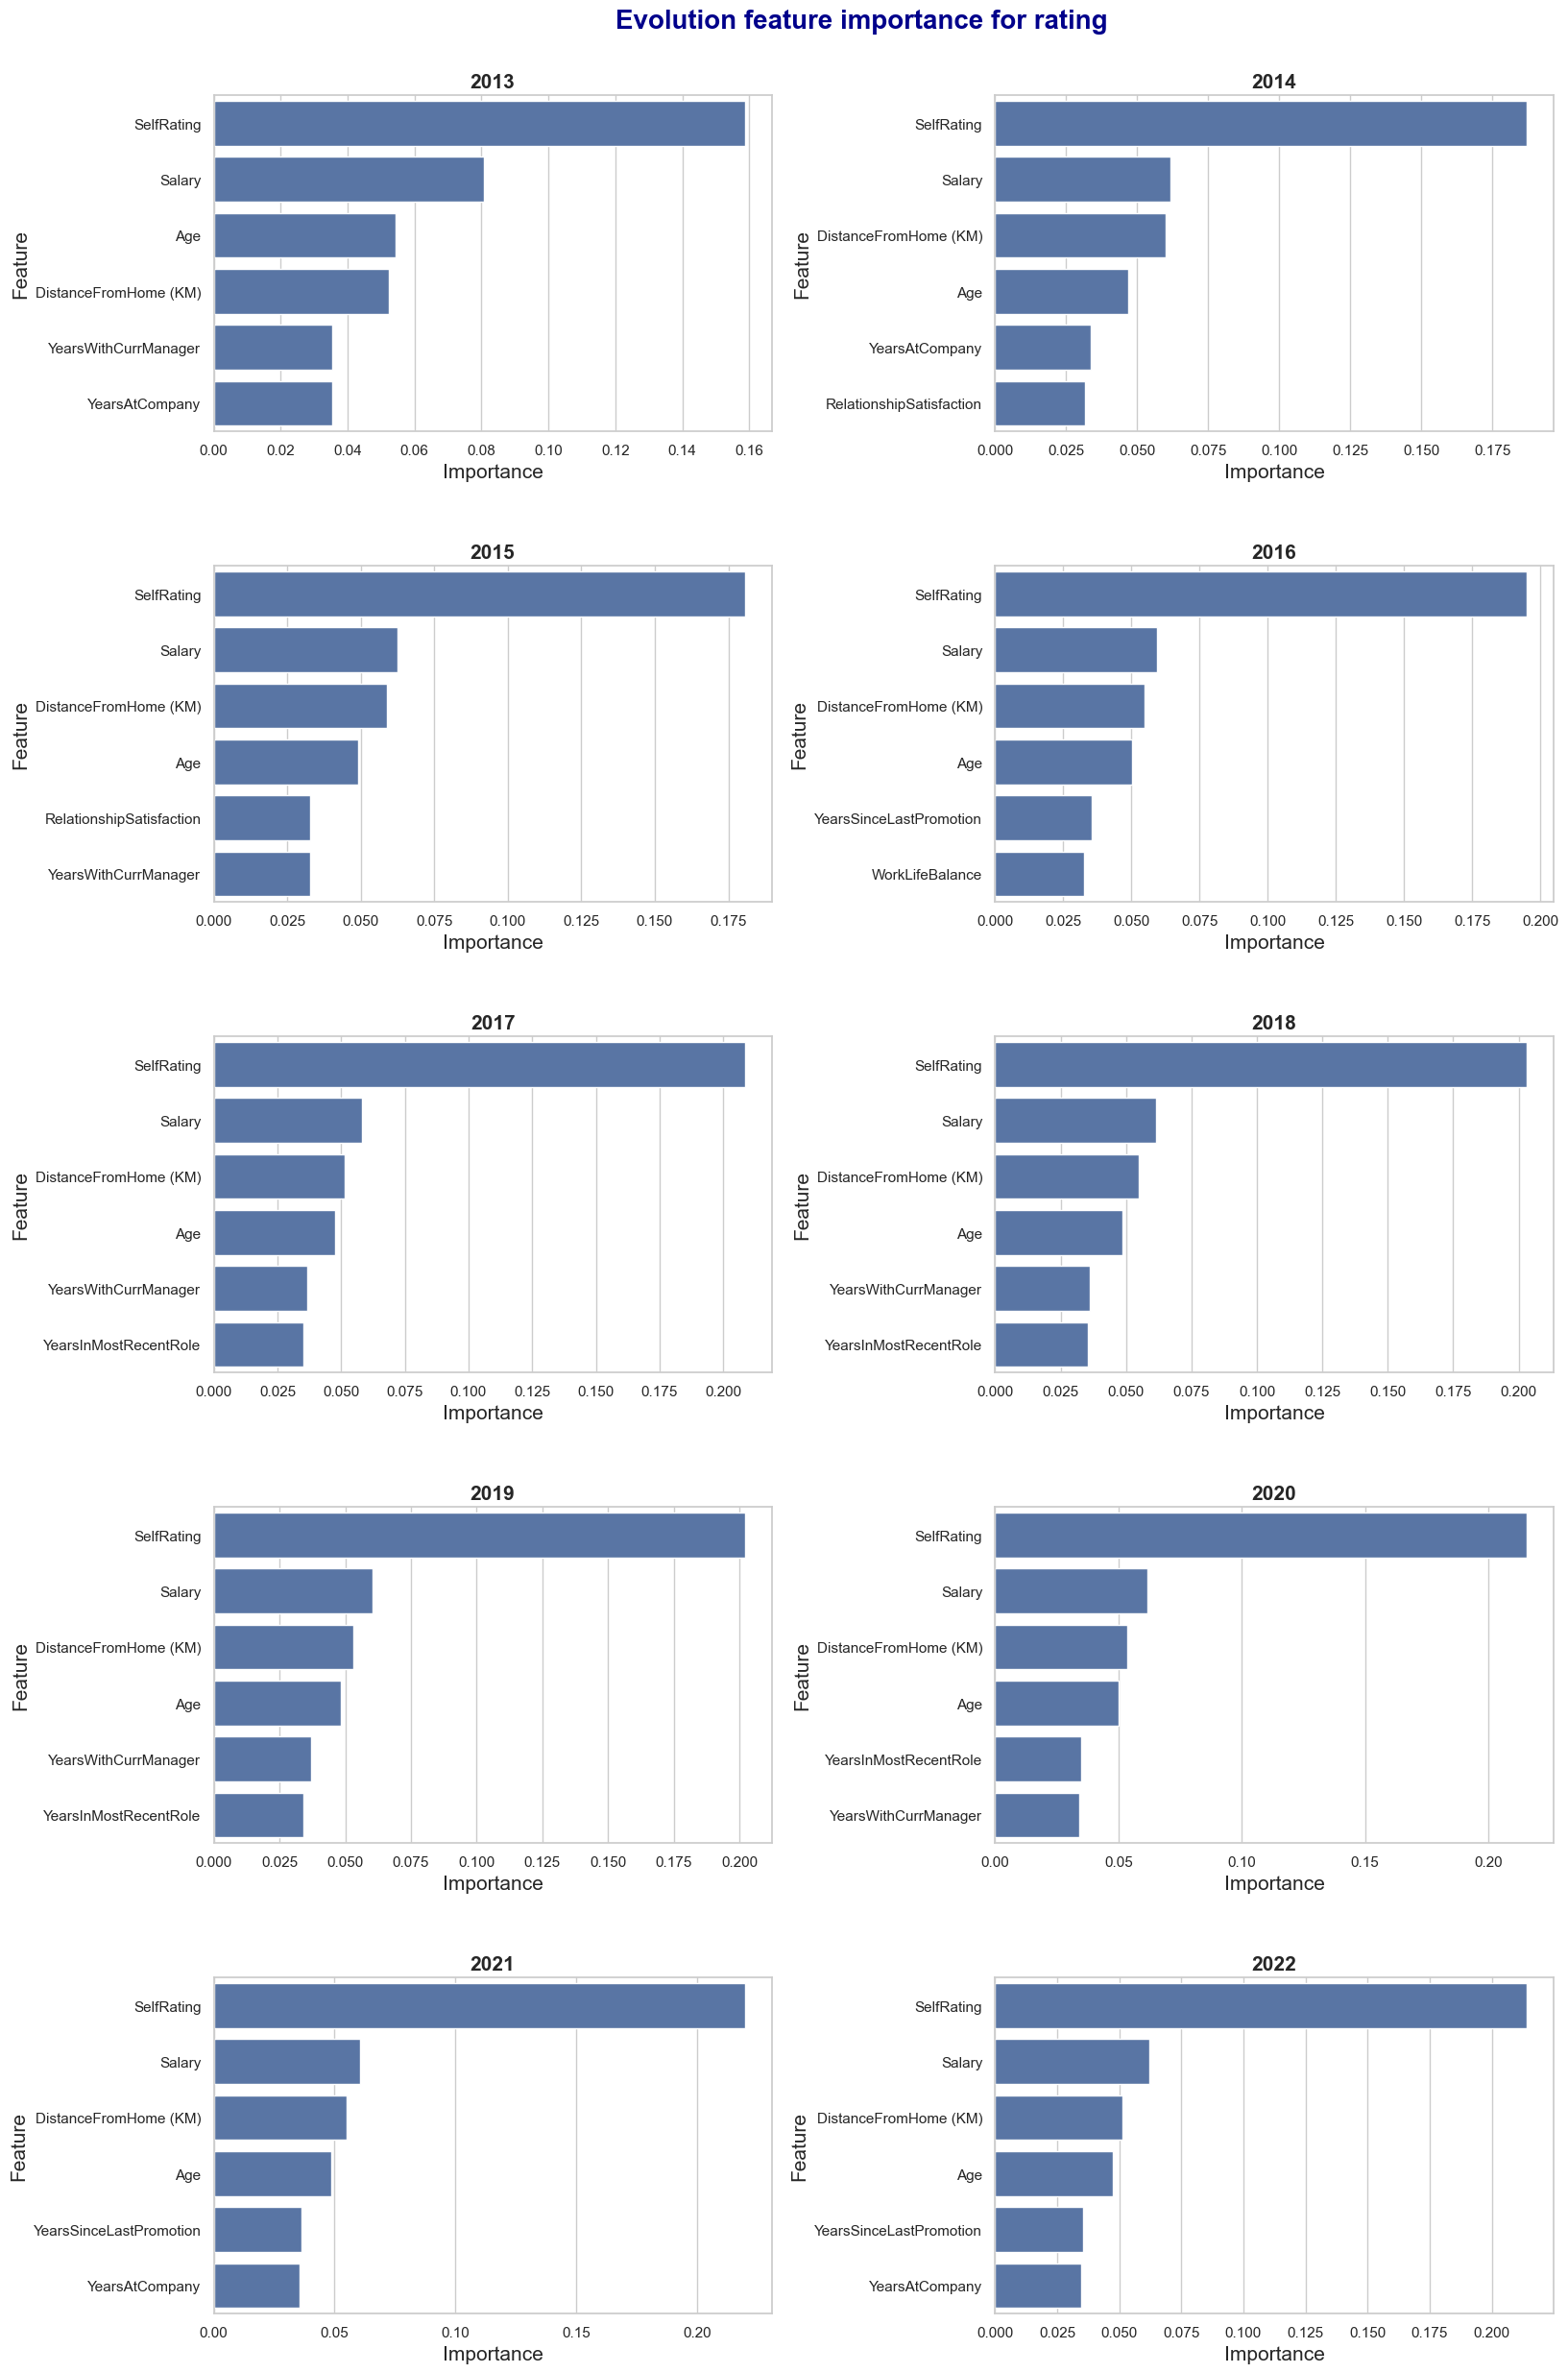

In [63]:
# Plot the feature importance
fig, axs = plt.subplots(5,2, figsize=(18,30))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
plt.suptitle('Evolution feature importance for rating', ha='center',
             fontsize=20, fontweight='bold',color='darkblue',y=0.91)

sns.barplot(x='Importance', y='Feature', data=model_rfc_2013,ax=axs[0,0])
sns.barplot(x='Importance', y='Feature', data=model_rfc_2014,ax=axs[0,1])
sns.barplot(x='Importance', y='Feature', data=model_rfc_2015,ax=axs[1,0])
sns.barplot(x='Importance', y='Feature', data=model_rfc_2016,ax=axs[1,1])
sns.barplot(x='Importance', y='Feature', data=model_rfc_2017,ax=axs[2,0])
sns.barplot(x='Importance', y='Feature', data=model_rfc_2018,ax=axs[2,1])
sns.barplot(x='Importance', y='Feature', data=model_rfc_2019,ax=axs[3,0])
sns.barplot(x='Importance', y='Feature', data=model_rfc_2020,ax=axs[3,1])
sns.barplot(x='Importance', y='Feature', data=model_rfc_2021,ax=axs[4,0])
sns.barplot(x='Importance', y='Feature', data=model_rfc_2022,ax=axs[4,1])

axs[0,0].set_title('2013', ha='center',fontsize=15, fontweight='bold')
axs[0,1].set_title('2014', ha='center',fontsize=15, fontweight='bold')
axs[1,0].set_title('2015', ha='center',fontsize=15, fontweight='bold')
axs[1,1].set_title('2016', ha='center',fontsize=15, fontweight='bold')
axs[2,0].set_title('2017', ha='center',fontsize=15, fontweight='bold')
axs[2,1].set_title('2018', ha='center',fontsize=15, fontweight='bold')
axs[3,0].set_title('2019', ha='center',fontsize=15, fontweight='bold')
axs[3,1].set_title('2020', ha='center',fontsize=15, fontweight='bold')
axs[4,0].set_title('2021', ha='center',fontsize=15, fontweight='bold')
axs[4,1].set_title('2022', ha='center',fontsize=15, fontweight='bold')
plt.show()

Đánh giá của quản lý chủ yếu bị ảnh hưởng bởi:

	•	mức lương của nhân viên,
	•	khoảng cách từ nhà đến nơi làm việc,
	•	tuổi tác,
	•	và thời gian làm việc với công ty và quản lý.

## <a id="2.5"></a>
## 2.5: Ai được thăng chức?
### 2.5.1:Sankey Diagram

Tạo ra một DF mới df_merged2, loại bỏ các hàng trong df_merged mà có giá trị EmployeeID là 'wrongID'.

In [64]:
df_merged2 = df_merged[df_merged['EmployeeID'] != 'wrongID']
df_merged2.head(2)

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
6,PR07,9E7A-1F70,2013-01-08,3,4,5,2,1,5,4,...,Single,129356,0,No,2012-05-02,Yes,5,1,1,2
11,PR1000,528C-3E0D,2016-03-16,4,4,2,2,2,4,5,...,Married,42045,0,Yes,2013-10-15,Yes,6,0,3,3


Thay đánh đánh 1->5 của ManagerRating thành 	

    •	Unacceptable: Không chấp nhận được
	•	Needs Improvement: Cần cải thiện
	•	Meets Expectation: Đáp ứng kỳ vọng
	•	Exceeds Expectation: Vượt qua kỳ vọng
	•	Above and Beyond: Xuất sắc, vượt trội

In [65]:
df_merged2['ManagerRating'] = df_merged2['ManagerRating'].replace(1, 'Unacceptable')
df_merged2['ManagerRating'] = df_merged2['ManagerRating'].replace(2, 'Needs Improvement')
df_merged2['ManagerRating'] = df_merged2['ManagerRating'].replace(3, 'Meets Expectation')
df_merged2['ManagerRating'] = df_merged2['ManagerRating'].replace(4, 'Exceeds Expectation')
df_merged2['ManagerRating'] = df_merged2['ManagerRating'].replace(5, 'Above and Beyond')

/var/folders/7f/wqjwng7d1p1_64fktlpb2_cw0000gn/T/ipykernel_63229/1242812076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged2['ManagerRating'] = df_merged2['ManagerRating'].replace(1, 'Unacceptable')
/var/folders/7f/wqjwng7d1p1_64fktlpb2_cw0000gn/T/ipykernel_63229/1242812076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged2['ManagerRating'] = df_merged2['ManagerRating'].replace(2, 'Needs Improvement')
/var/folders/7f/wqjwng7d1p1_64fktlpb2_cw0000gn/T/ipykernel_63229/1242812076.py:3:

In [66]:
def graph(col1):
    #  df_merged2tồn tại và có các data cần thiết
    # Nhóm dữ liệu và chuẩn bị dữ liệu
    df1 = df_merged2.groupby([col1, 'ManagerRating'], observed=True).size().reset_index(name='count')
    df2 = df_merged2.groupby(['ManagerRating', 'Attrition'], observed=True).size().reset_index(name='count')
    df3 = df_merged2.groupby(['Attrition', 'YearsSinceLastPromotion'], observed=True).size().reset_index(name='count')

    # Trích xuất các danh mục duy nhất để gán nhãn để đảm bảo duy nhất và clean
    unique_Ethnicity = df1[col1].unique().tolist()
    unique_ManagerRating = df1['ManagerRating'].unique().tolist()
    unique_Attrition = df2['Attrition'].unique().tolist()
    unique_YearsSinceLastPromotion = df3['YearsSinceLastPromotion'].unique().tolist()

    # kết hợp tất cả các nhãn từ các cột dữ liệu khác nhau và đảm bảo rằng chúng là chuỗi và không khoãng trắng
    labels = list(set([str(label).strip() for label in unique_Ethnicity + unique_ManagerRating + unique_Attrition + unique_YearsSinceLastPromotion]))

    # Chuyển các nhãn thành các chỉ số số nguyên  for Sankey nodes
    label_to_index = {label: idx for idx, label in enumerate(labels)}

    # Tạo lists for Sankey source, target, and value
    source = [] #đầu vào
    target = []
    value = []

    # Điền data vào dòng chảy biểu đồ 
    for _, row in df1.iterrows():
        source.append(label_to_index[str(row[col1]).strip()])
        target.append(label_to_index[str(row['ManagerRating']).strip()])
        value.append(row['count'])

    for _, row in df2.iterrows():
        source.append(label_to_index[str(row['ManagerRating']).strip()])
        target.append(label_to_index[str(row['Attrition']).strip()])
        value.append(row['count'])

    for _, row in df3.iterrows():
        source.append(label_to_index[str(row['Attrition']).strip()])
        target.append(label_to_index[str(row['YearsSinceLastPromotion']).strip()])
        value.append(row['count'])

    # Build and display the Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node={
            'pad': 15,
            'thickness': 20,
            'line': {'color': "black", 'width': 0.5},
            'label': labels
        },
        link={
            'source': source,
            'target': target,
            'value': value
        }
    )])

    fig.update_layout(title_text="Sankey Diagram: {} / ManagerRating / Attrition / YearsSinceLastPromotion".format(col1), font_size=10)
    fig.show()


In [67]:
graph("Gender")

In [68]:
graph("Ethnicity")

In [69]:
graph("JobRole")